In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, RobustScaler


In [2]:
df = pd.read_csv("american_bankruptcy.csv")
df.head()

company_name status_label  year       X1       X2      X3      X4       X5  \
0          C_1        alive  1999  511.267  833.107  18.373  89.031  336.018   
1          C_1        alive  2000  485.856  713.811  18.577  64.367  320.590   
2          C_1        alive  2001  436.656  526.477  22.496  27.207  286.588   
3          C_1        alive  2002  396.412  496.747  27.172  30.745  259.954   
4          C_1        alive  2003  432.204  523.302  26.680  47.491  247.245   

       X6       X7  ...        X9      X10      X11     X12      X13      X14  \
0  35.163  128.348  ...  1024.333  740.998  180.447  70.658  191.226  163.816   
1  18.531  115.187  ...   874.255  701.854  179.987  45.790  160.444  125.392   
2 -58.939   77.528  ...   638.721  710.199  217.699   4.711  112.244  150.464   
3 -12.410   66.322  ...   606.337  686.621  164.658   3.573  109.590  203.575   
4   3.504  104.661  ...   651.958  709.292  248.666  20.811  128.656  131.261   

       X15       X16      X17      X18  
0  201.026  1024.333  401.483  935.302  
1  204.065   874.255  361.642  809.888  
2  139.603   638.721  399.964  611.514  
3  124.106   606.337  391.633  575.592  
4  131.884   651.958  407.608  604.467  

[5 rows x 21 columns]

Data Preprocessing


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

year             X1             X2            X3            X4  \
count  78682.000000   78682.000000   78682.000000  78682.000000  78682.000000   
mean    2007.506317     880.362485    1594.529029    121.234256    376.759424   
std        5.742768    3928.564794    8930.484664    652.376804   2012.023142   
min     1999.000000      -7.760000    -366.645000      0.000000 -21913.000000   
25%     2002.000000      18.924000      17.038250      1.192000     -0.811000   
50%     2007.000000     100.449500     103.661000      7.929500     15.034500   
75%     2012.000000     431.526750     634.548000     47.971750    139.655250   
max     2018.000000  169662.000000  374623.000000  28430.000000  81730.000000   

                 X5             X6            X7            X8             X9  \
count  78682.000000   78682.000000  78682.000000  7.868200e+04   78682.000000   
mean     201.605717     129.382453    286.832743  3.414355e+03    2364.019706   
std     1060.766096    1265.532022   1335.978571  1.841410e+04   11950.068842   
min        0.000000  -98696.000000     -0.006000  1.000000e-04   -1964.999000   
25%        0.000000      -7.415750      3.281250  3.498000e+01      27.548500   
50%        7.023000       1.616000     22.820000  2.275118e+02     186.598500   
75%       74.747250      40.144250    131.580500  1.244890e+03    1046.402500   
max    62567.000000  104821.000000  65812.000000  1.073391e+06  511729.000000   

                 X10            X11           X12            X13  \
count   78682.000000   78682.000000  78682.000000   78682.000000   
mean     2867.110620     722.483710    255.525035     769.490783   
std     12917.944421    3242.170946   1494.643534    3774.703114   
min         0.001000      -0.023000 -25913.000000  -21536.000000   
25%        37.363500       0.000000     -2.787000       8.521250   
50%       213.203500       7.593500      6.518000      63.581500   
75%      1171.364750     248.760750     87.599000     344.074250   
max    531864.000000  166250.000000  71230.000000  137106.000000   

                 X14            X15            X16            X17  \
count   78682.000000   78682.000000   78682.000000   78682.000000   
mean      610.072255     532.467069    2364.019706    1773.563963   
std      2938.387443    6369.159440   11950.068842    8053.684902   
min         0.001000 -102362.000000   -1964.999000       0.001000   
25%         8.889250     -68.282750      27.548500      13.486000   
50%        43.333000      -1.131000     186.598500      81.988000   
75%       222.817000     146.070000    1046.402500     629.975000   
max    116866.000000  402089.000000  511729.000000  337980.000000   

                 X18  
count   78682.000000  
mean     1987.260307  
std     10419.629038  
min      -317.197000  
25%        32.872500  
50%       168.912000  
75%       875.522250  
max    481580.000000

In [4]:
df = df.rename( columns={
'X1':'Current assets',
'X2':'Cost of goods sold',
'X3': 'Depreciation and amortization',
'X4':'EBITDA',
'X5': 'Inventory',
'X6' : "Net Income",
'X7':'Total Receivables',
'X8' : 'Market Value',
'X9' : 'Net sales',
'X10': 'Total assets',
'X11': 'Total Long-term debt',
'X12' : 'EBIT',
'X13':'Gross Profit',
'X14': 'Total Current Liabilities',
'X15' : 'Retained Earnings',
'X16': 'Total Revenue',
'X17' : 'Total Liabilities',
'X18': 'Total Operating Expenses',

})
df.columns

Index(['company_name', 'status_label', 'year', 'Current assets',
       'Cost of goods sold', 'Depreciation and amortization', 'EBITDA',
       'Inventory', 'Net Income', 'Total Receivables', 'Market Value',
       'Net sales', 'Total assets', 'Total Long-term debt', 'EBIT',
       'Gross Profit', 'Total Current Liabilities', 'Retained Earnings',
       'Total Revenue', 'Total Liabilities', 'Total Operating Expenses'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  object 
 2   year                           78682 non-null  int64  
 3   Current assets                 78682 non-null  float64
 4   Cost of goods sold             78682 non-null  float64
 5   Depreciation and amortization  78682 non-null  float64
 6   EBITDA                         78682 non-null  float64
 7   Inventory                      78682 non-null  float64
 8   Net Income                     78682 non-null  float64
 9   Total Receivables              78682 non-null  float64
 10  Market Value                   78682 non-null  float64
 11  Net sales                      78682 non-null  float64
 12  Total assets                   78682 non-null 

In [6]:
Null_value = [x for x in df.columns if df[x].isnull().sum()>0]
for x in Null_value:
    print(x, df[x].isnull().sum())
else:
    print('No Missisng Values')

No Missisng Values


In [7]:
for i in df.columns:
    print(f"{i}:, {df[i].nunique()}")

company_name:, 8971
status_label:, 2
year:, 20
Current assets:, 65895
Cost of goods sold:, 65690
Depreciation and amortization:, 36010
EBITDA:, 59060
Inventory:, 38898
Net Income:, 55550
Total Receivables:, 49577
Market Value:, 77580
Net sales:, 68596
Total assets:, 71521
Total Long-term debt:, 39741
EBIT:, 56949
Gross Profit:, 64952
Total Current Liabilities:, 58685
Retained Earnings:, 72062
Total Revenue:, 68596
Total Liabilities:, 64640
Total Operating Expenses:, 70840


In [8]:
df['status_label'].astype('str').str.lower()
df['status_label'] = df['status_label'] = df['status_label'].replace({
    'alive': 1,
    'failed': 0
}).astype('category')
df['status_label'].nunique()

C:\Users\AFC\AppData\Local\Temp\ipykernel_2788\240093521.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['status_label'] = df['status_label'] = df['status_label'].replace({


2

In [9]:
df[['company_name','year']].duplicated().sum()

np.int64(0)

In [10]:
categorical_features = df.select_dtypes(include=['category']).columns.tolist()
categorical_features
df.head()

company_name status_label  year  Current assets  Cost of goods sold  \
0          C_1            1  1999         511.267             833.107   
1          C_1            1  2000         485.856             713.811   
2          C_1            1  2001         436.656             526.477   
3          C_1            1  2002         396.412             496.747   
4          C_1            1  2003         432.204             523.302   

   Depreciation and amortization  EBITDA  Inventory  Net Income  \
0                         18.373  89.031    336.018      35.163   
1                         18.577  64.367    320.590      18.531   
2                         22.496  27.207    286.588     -58.939   
3                         27.172  30.745    259.954     -12.410   
4                         26.680  47.491    247.245       3.504   

   Total Receivables  ...  Net sales  Total assets  Total Long-term debt  \
0            128.348  ...   1024.333       740.998               180.447   
1            115.187  ...    874.255       701.854               179.987   
2             77.528  ...    638.721       710.199               217.699   
3             66.322  ...    606.337       686.621               164.658   
4            104.661  ...    651.958       709.292               248.666   

     EBIT  Gross Profit  Total Current Liabilities  Retained Earnings  \
0  70.658       191.226                    163.816            201.026   
1  45.790       160.444                    125.392            204.065   
2   4.711       112.244                    150.464            139.603   
3   3.573       109.590                    203.575            124.106   
4  20.811       128.656                    131.261            131.884   

   Total Revenue  Total Liabilities  Total Operating Expenses  
0       1024.333            401.483                   935.302  
1        874.255            361.642                   809.888  
2        638.721            399.964                   611.514  
3        606.337            391.633                   575.592  
4        651.958            407.608                   604.467  

[5 rows x 21 columns]

In [11]:
# list of numerical variables
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].nunique()

Number of numerical variables:  19


year                                20
Current assets                   65895
Cost of goods sold               65690
Depreciation and amortization    36010
EBITDA                           59060
Inventory                        38898
Net Income                       55550
Total Receivables                49577
Market Value                     77580
Net sales                        68596
Total assets                     71521
Total Long-term debt             39741
EBIT                             56949
Gross Profit                     64952
Total Current Liabilities        58685
Retained Earnings                72062
Total Revenue                    68596
Total Liabilities                64640
Total Operating Expenses         70840
dtype: int64

In [12]:
discrete_features = [col for col in numerical_features if df[col].nunique() <= 30]
continuous_features = [col for col in numerical_features if df[col].nunique() > 30]
discrete_features = df[discrete_features].astype('int')
# Step 3: Print results
print("Number of numerical columns:", len(numerical_features))
print("Discrete Features:", discrete_features, "Data type", discrete_features.dtypes)
print("Continuous Features:", continuous_features)

Number of numerical columns: 19
Discrete Features:        year
0      1999
1      2000
2      2001
3      2002
4      2003
...     ...
78677  2014
78678  2015
78679  2016
78680  2017
78681  2018

[78682 rows x 1 columns] Data type year    int64
dtype: object
Continuous Features: ['Current assets', 'Cost of goods sold', 'Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income', 'Total Receivables', 'Market Value', 'Net sales', 'Total assets', 'Total Long-term debt', 'EBIT', 'Gross Profit', 'Total Current Liabilities', 'Retained Earnings', 'Total Revenue', 'Total Liabilities', 'Total Operating Expenses']


EXPLORATRY DATA ANALYSIS

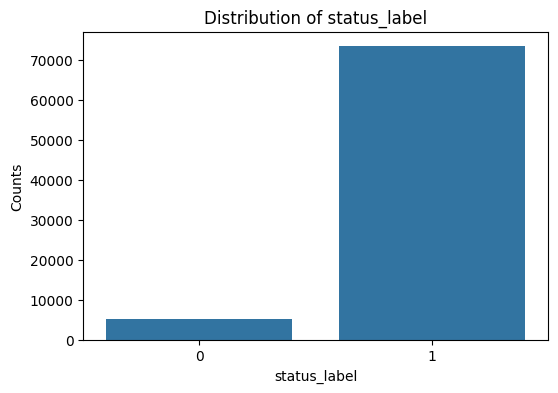

In [13]:
def plot_categotical_distribution(df,categorical_features):
    plt.figure(figsize = (6,4))
    for i, col in enumerate(categorical_features):
        value_counts = df[col].value_counts()
        sns.barplot(x = value_counts.index, y=value_counts.values)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Counts")
    plt.show
plot_categotical_distribution(df,categorical_features)

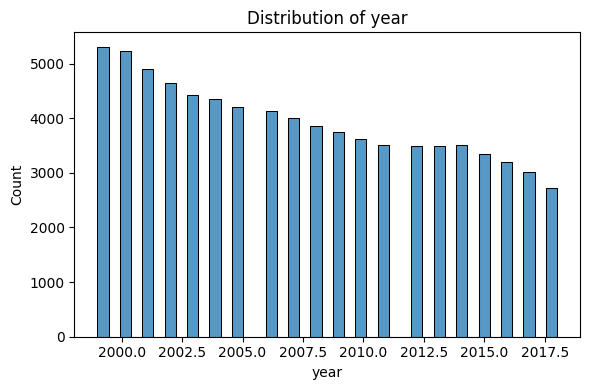

In [14]:
def plot_discrete_features(df, discrete_features):
    plt.figure(figsize = (6,4))
    for i, col in enumerate(discrete_features):
        sns.histplot(data = discrete_features, x = col)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
plot_discrete_features(df, discrete_features)

In [15]:
df[continuous_features].describe()

Current assets  Cost of goods sold  Depreciation and amortization  \
count    78682.000000        78682.000000                   78682.000000   
mean       880.362485         1594.529029                     121.234256   
std       3928.564794         8930.484664                     652.376804   
min         -7.760000         -366.645000                       0.000000   
25%         18.924000           17.038250                       1.192000   
50%        100.449500          103.661000                       7.929500   
75%        431.526750          634.548000                      47.971750   
max     169662.000000       374623.000000                   28430.000000   

             EBITDA     Inventory     Net Income  Total Receivables  \
count  78682.000000  78682.000000   78682.000000       78682.000000   
mean     376.759424    201.605717     129.382453         286.832743   
std     2012.023142   1060.766096    1265.532022        1335.978571   
min   -21913.000000      0.000000  -98696.000000          -0.006000   
25%       -0.811000      0.000000      -7.415750           3.281250   
50%       15.034500      7.023000       1.616000          22.820000   
75%      139.655250     74.747250      40.144250         131.580500   
max    81730.000000  62567.000000  104821.000000       65812.000000   

       Market Value      Net sales   Total assets  Total Long-term debt  \
count  7.868200e+04   78682.000000   78682.000000          78682.000000   
mean   3.414355e+03    2364.019706    2867.110620            722.483710   
std    1.841410e+04   11950.068842   12917.944421           3242.170946   
min    1.000000e-04   -1964.999000       0.001000             -0.023000   
25%    3.498000e+01      27.548500      37.363500              0.000000   
50%    2.275118e+02     186.598500     213.203500              7.593500   
75%    1.244890e+03    1046.402500    1171.364750            248.760750   
max    1.073391e+06  511729.000000  531864.000000         166250.000000   

               EBIT   Gross Profit  Total Current Liabilities  \
count  78682.000000   78682.000000               78682.000000   
mean     255.525035     769.490783                 610.072255   
std     1494.643534    3774.703114                2938.387443   
min   -25913.000000  -21536.000000                   0.001000   
25%       -2.787000       8.521250                   8.889250   
50%        6.518000      63.581500                  43.333000   
75%       87.599000     344.074250                 222.817000   
max    71230.000000  137106.000000              116866.000000   

       Retained Earnings  Total Revenue  Total Liabilities  \
count       78682.000000   78682.000000       78682.000000   
mean          532.467069    2364.019706        1773.563963   
std          6369.159440   11950.068842        8053.684902   
min       -102362.000000   -1964.999000           0.001000   
25%           -68.282750      27.548500          13.486000   
50%            -1.131000     186.598500          81.988000   
75%           146.070000    1046.402500         629.975000   
max        402089.000000  511729.000000      337980.000000   

       Total Operating Expenses  
count              78682.000000  
mean                1987.260307  
std                10419.629038  
min                 -317.197000  
25%                   32.872500  
50%                  168.912000  
75%                  875.522250  
max               481580.000000

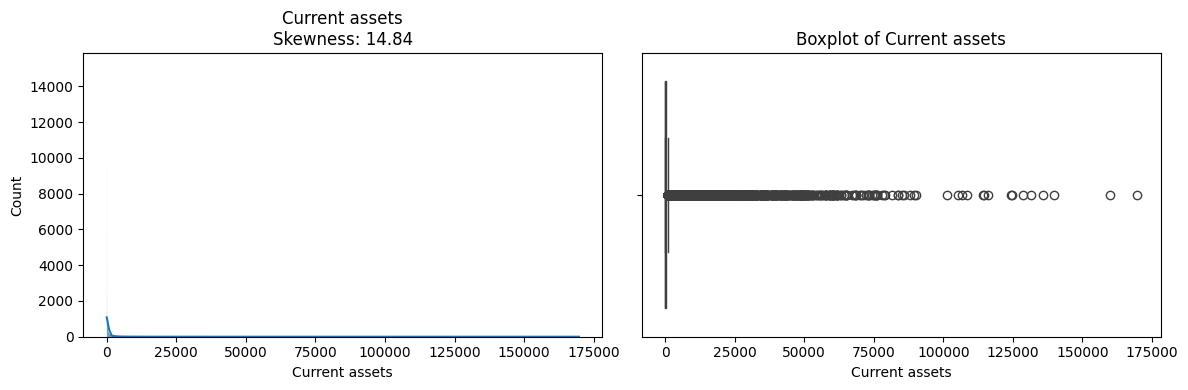

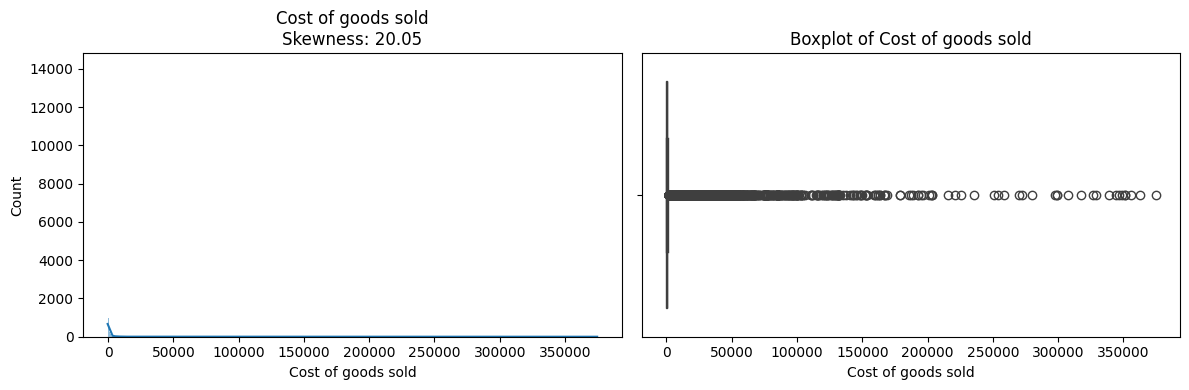

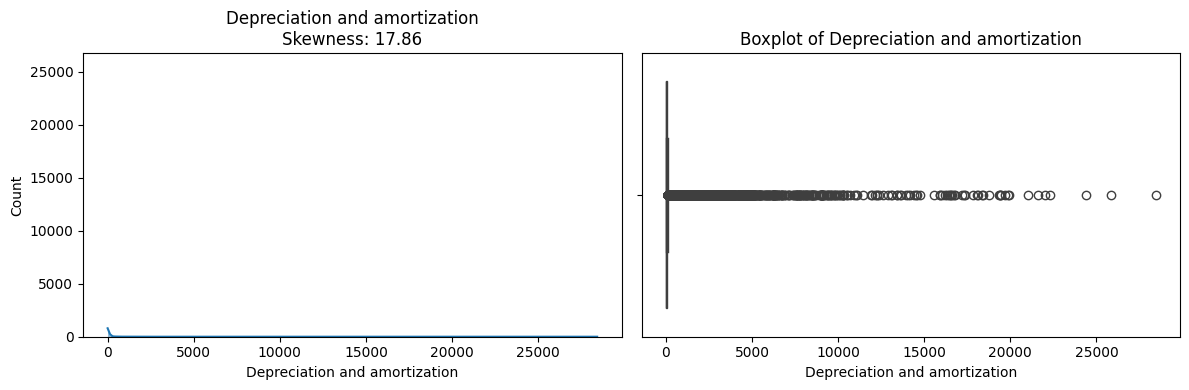

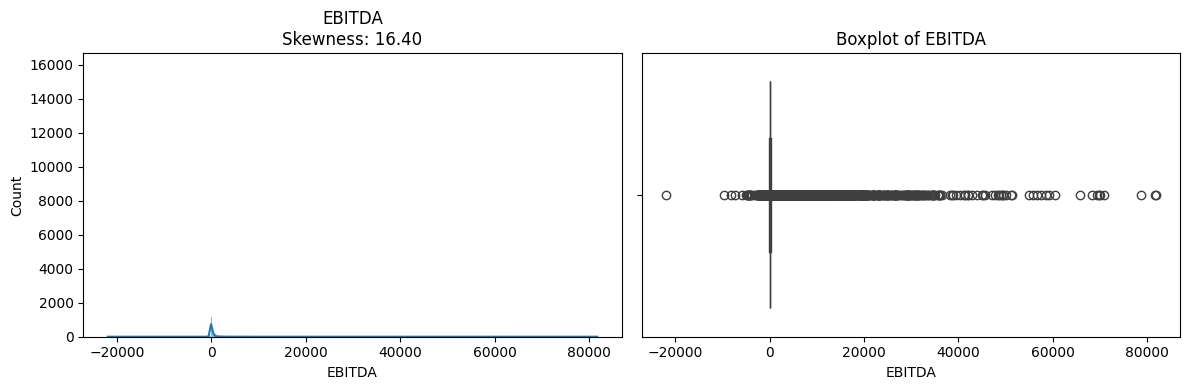

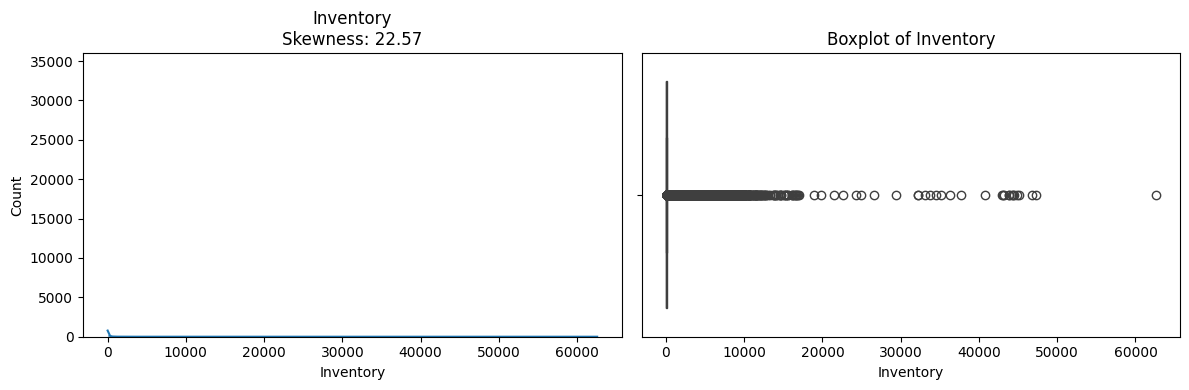

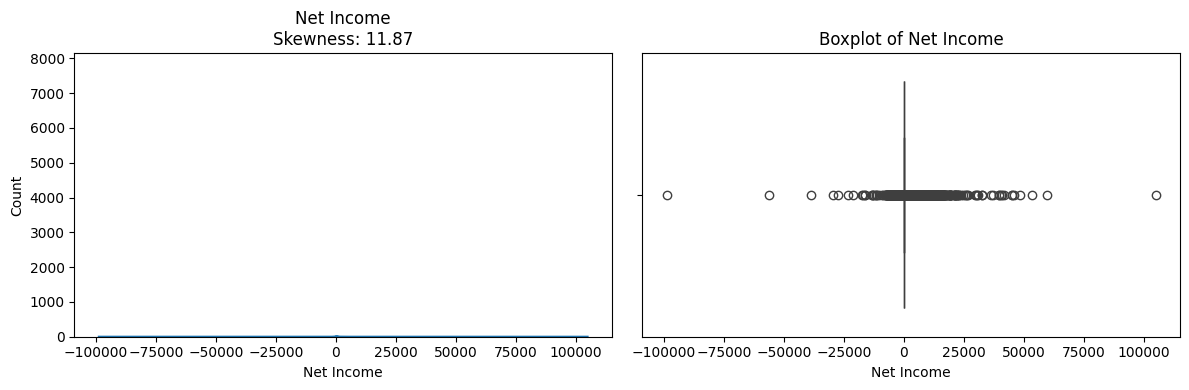

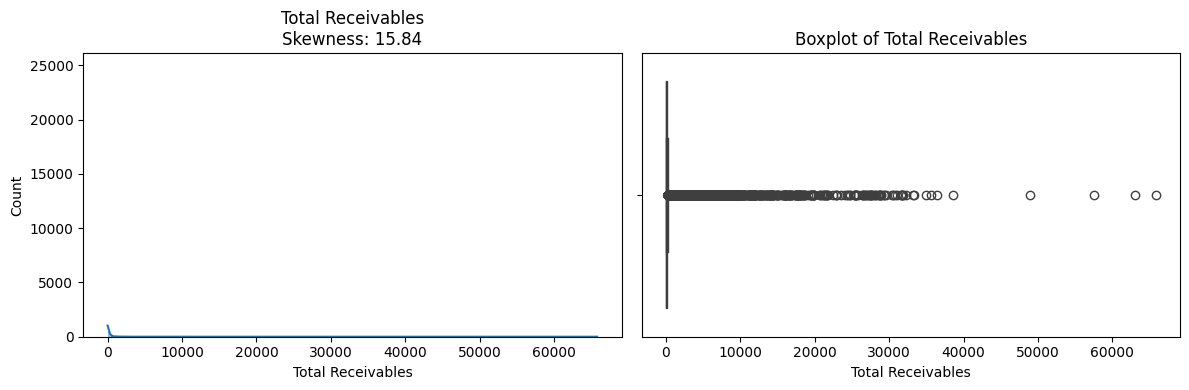

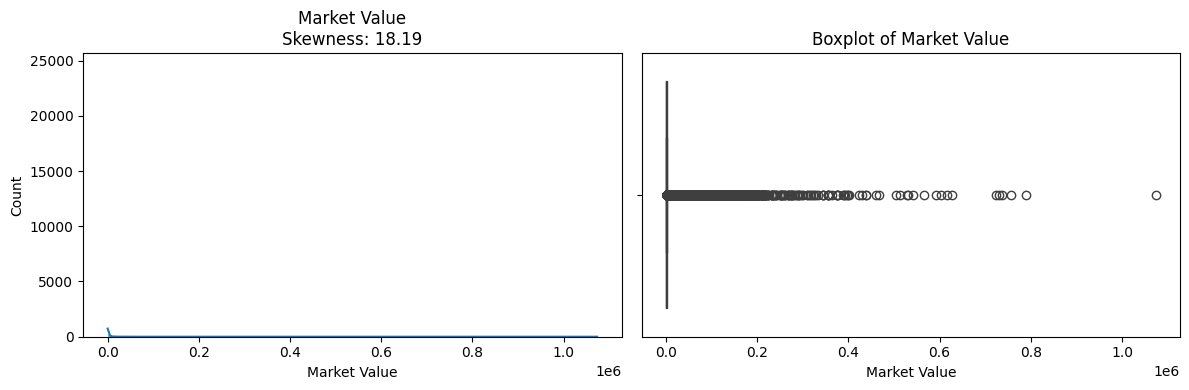

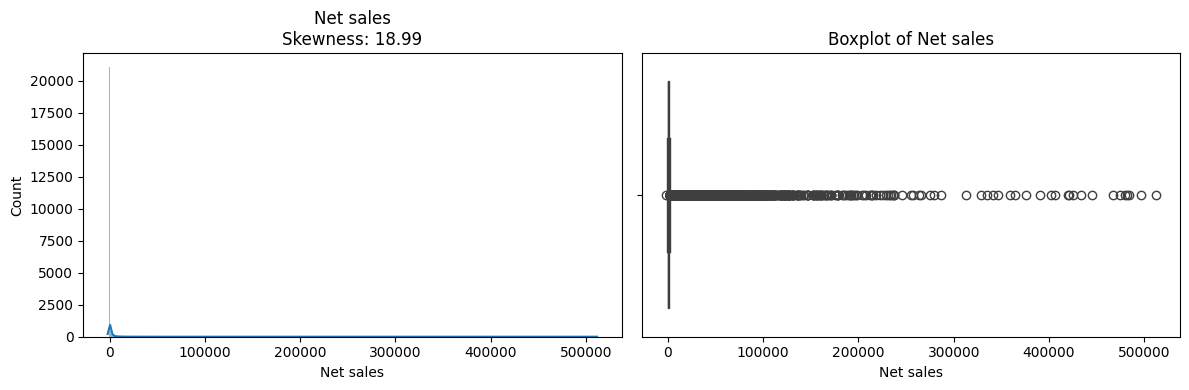

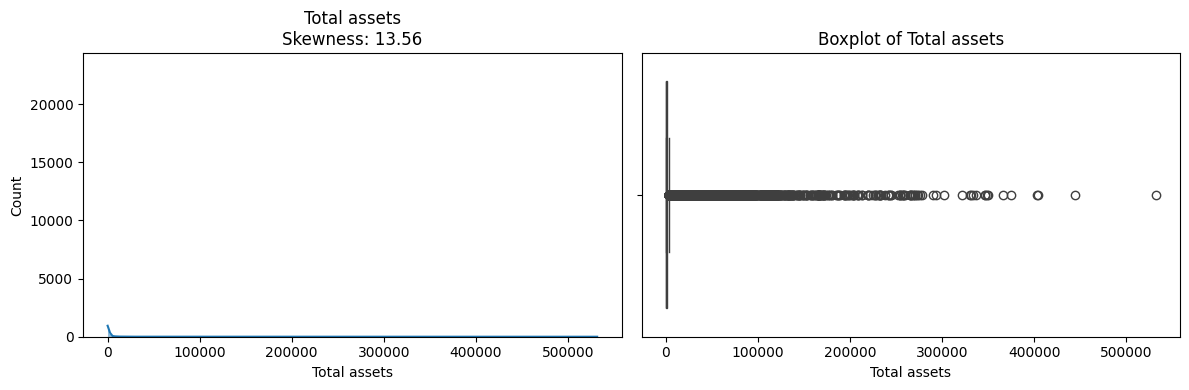

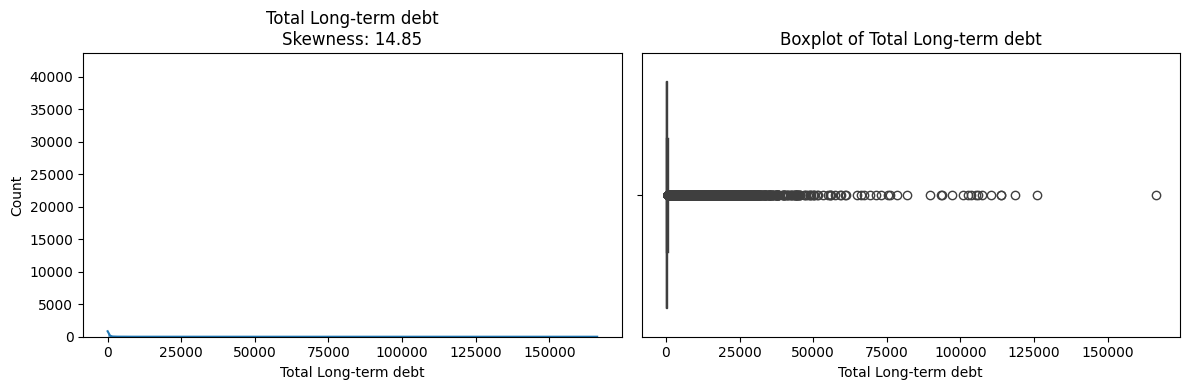

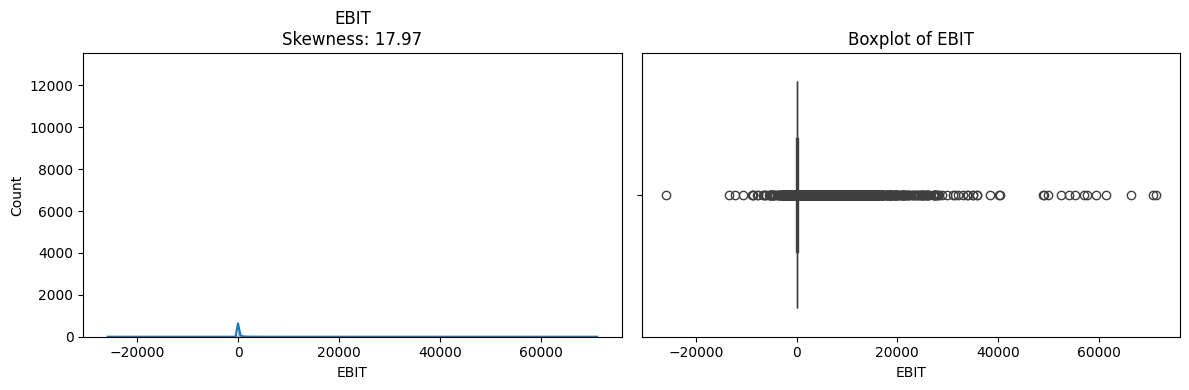

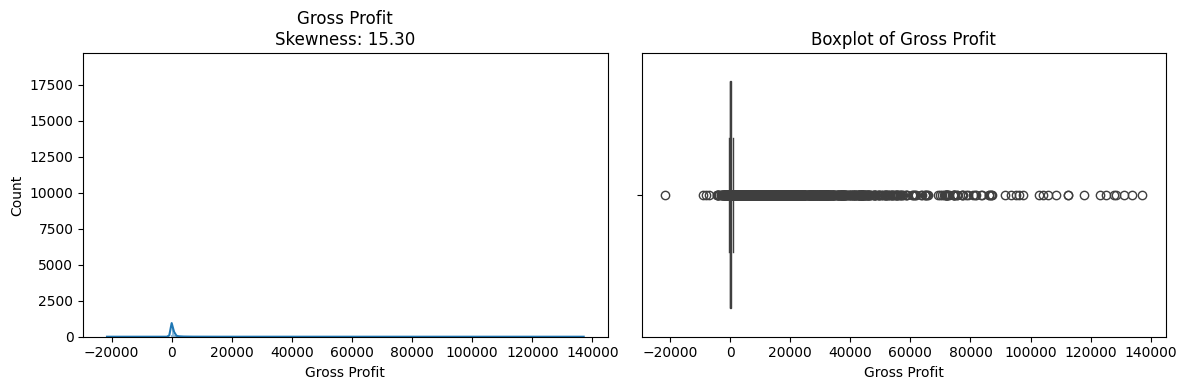

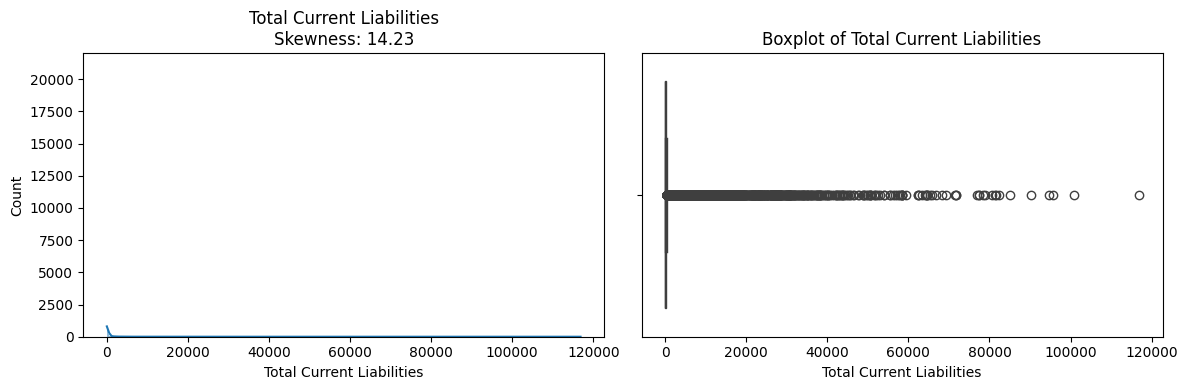

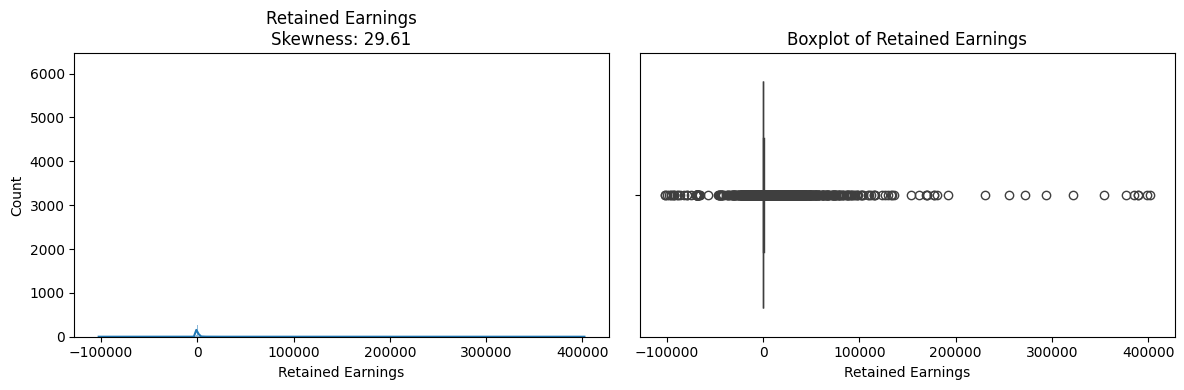

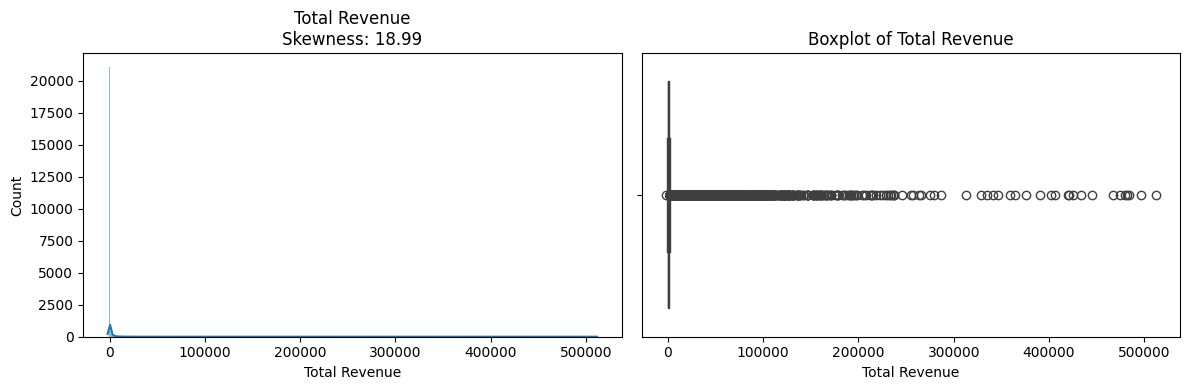

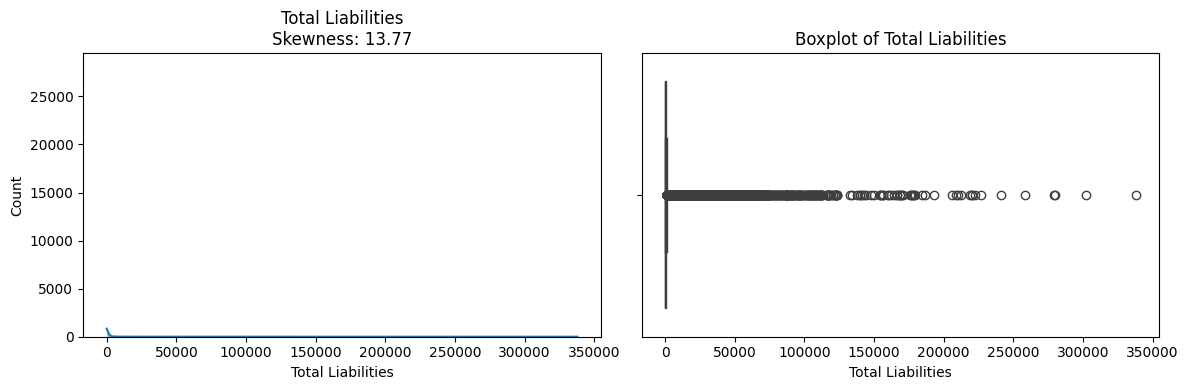

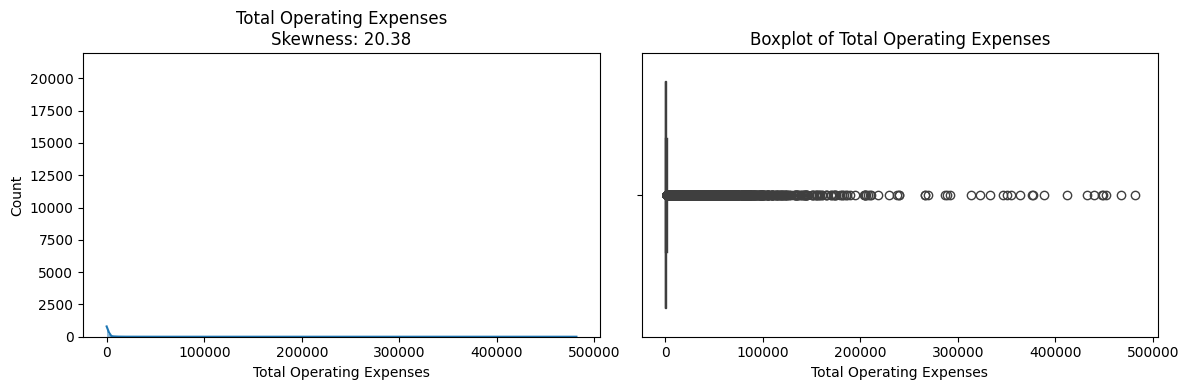

In [16]:
for col in continuous_features:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    
    sk = df[col].skew()
    plt.title(f'{col}\nSkewness: {sk:.2f}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


In [17]:
def eda_transform_plot(df, num, skew_threshold=0.5, return_transformed=False):
    pt = PowerTransformer(method='yeo-johnson')
    scaler = RobustScaler()
    
    transformed_data = {}

    for col in num:
        data = df[col].dropna()
        skewness = skew(data)
        print(f"{col} - Skewness: {skewness:.2f}")

        if abs(skewness) < skew_threshold:
            print(f"→ Skew is low. Skipping transformation for: {col}")
            transformed_data[col] = data
            continue

        # Transform
        reshaped = data.values.reshape(-1, 1)
        data_pt = pt.fit_transform(reshaped)
        data_scaled = scaler.fit_transform(data_pt).flatten()
        transformed_data[col] = pd.Series(data_scaled, index=data.index)

        # Plot
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        sns.histplot(data, kde=True, bins=30, color='steelblue')
        plt.title(f"Original: {col}\nSkew: {skewness:.2f}")

        plt.subplot(1, 2, 2)
        sns.histplot(data_scaled, kde=True, bins=30, color='seagreen')
        new_skew = skew(data_scaled)
        plt.title(f"Transformed: {col}\nSkew: {new_skew:.2f}")

        plt.tight_layout()
        plt.show()
    
    if return_transformed:
        return pd.DataFrame(transformed_data)



Current assets - Skewness: 14.84


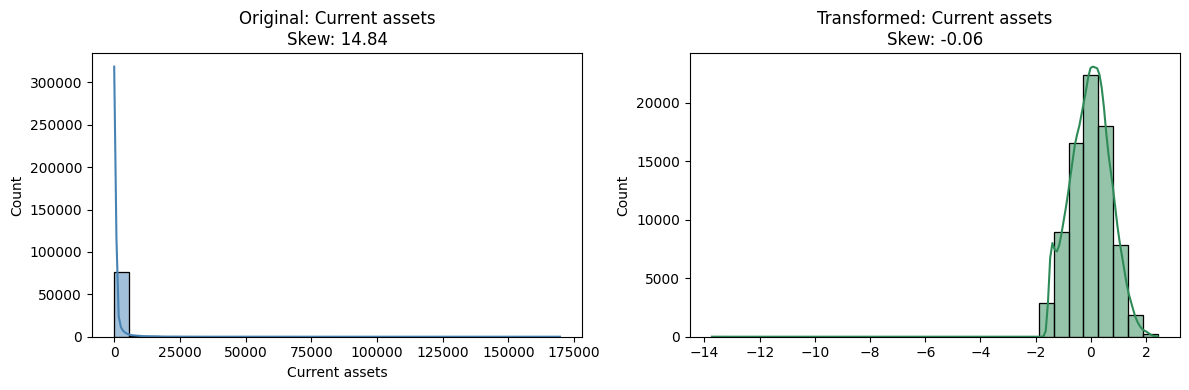

Cost of goods sold - Skewness: 20.05


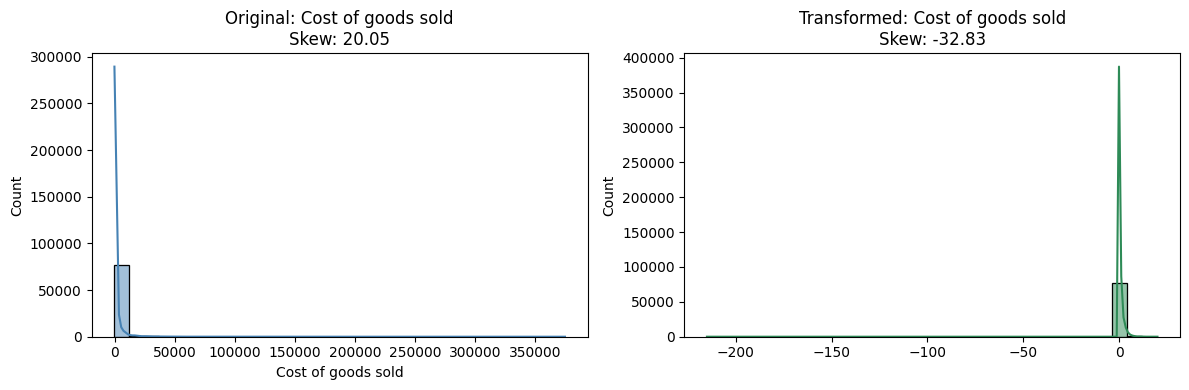

Depreciation and amortization - Skewness: 17.86


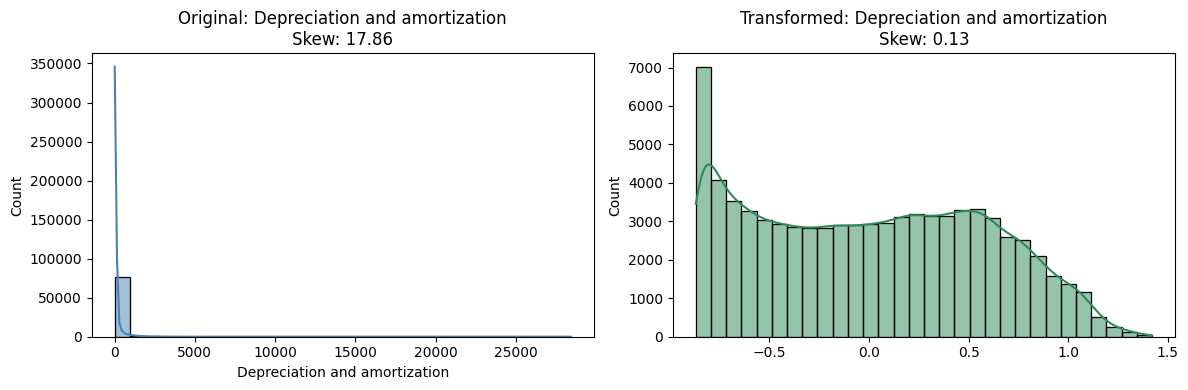

EBITDA - Skewness: 16.40


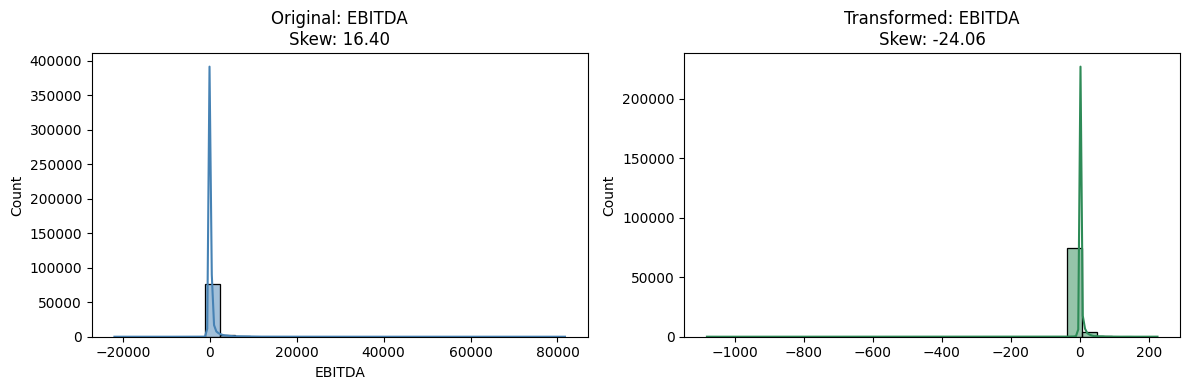

Inventory - Skewness: 22.57


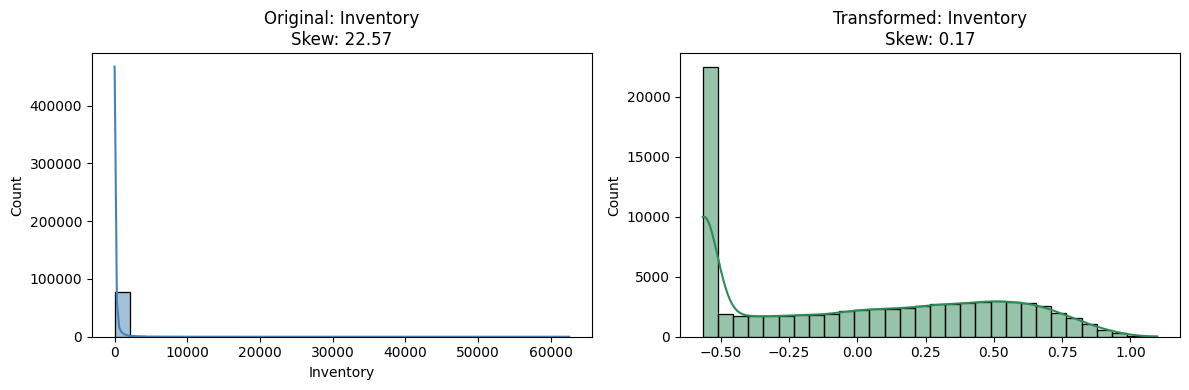

Net Income - Skewness: 11.87


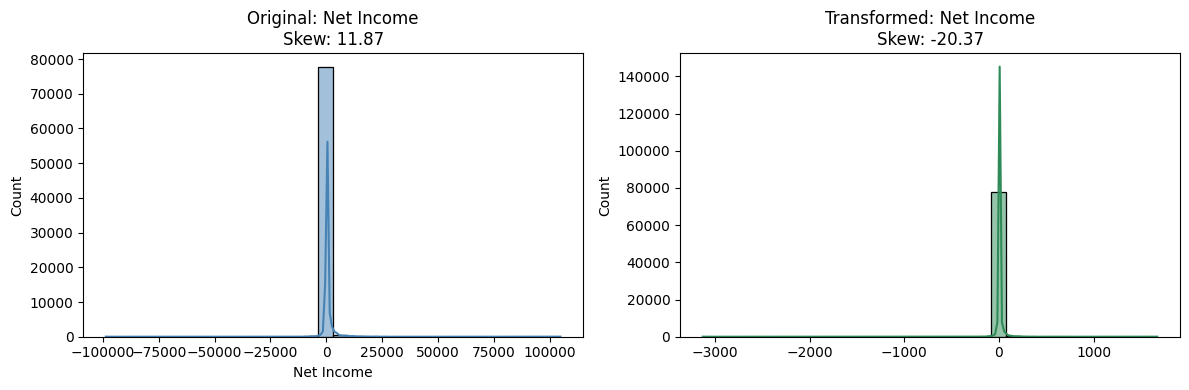

Total Receivables - Skewness: 15.84


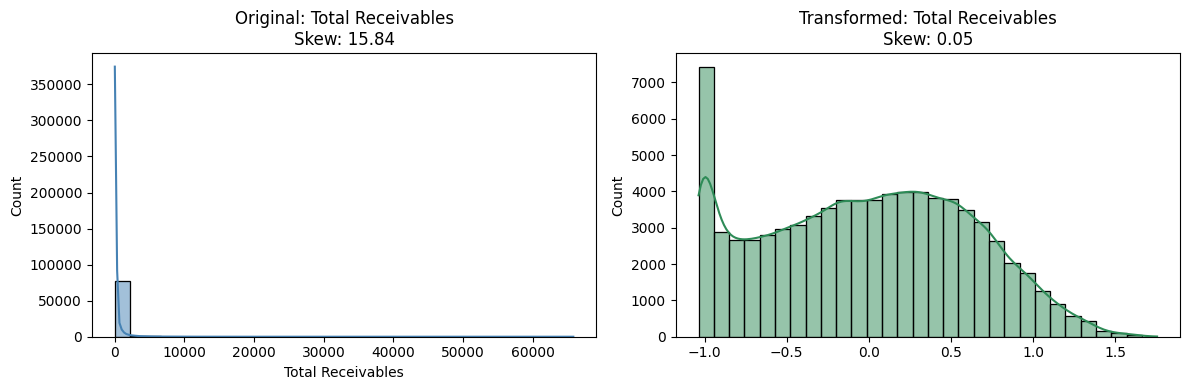

Market Value - Skewness: 18.19


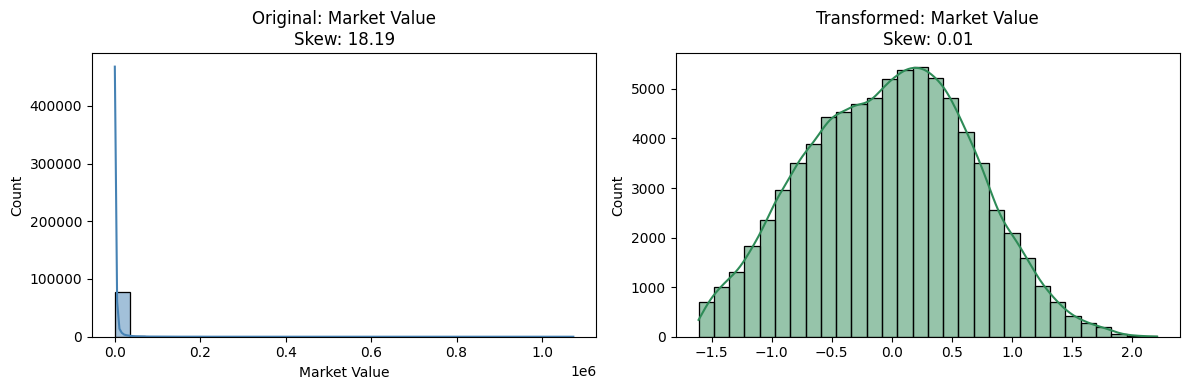

Net sales - Skewness: 18.99


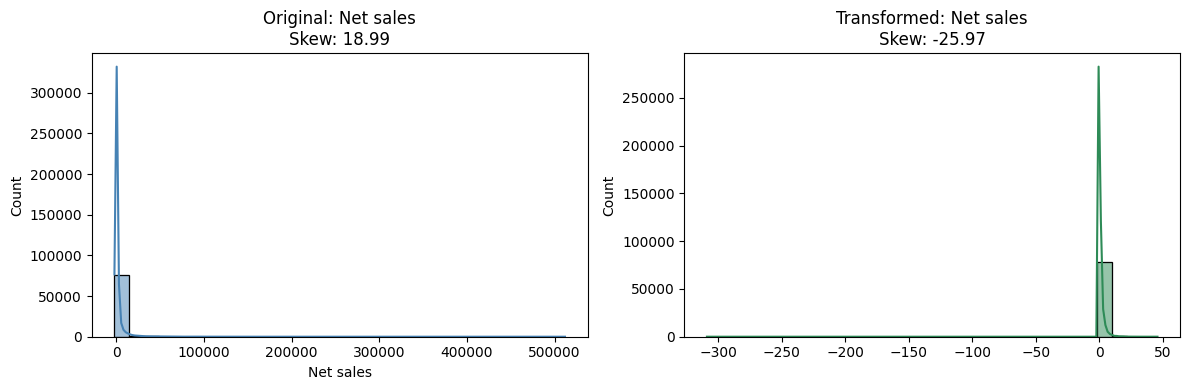

Total assets - Skewness: 13.56


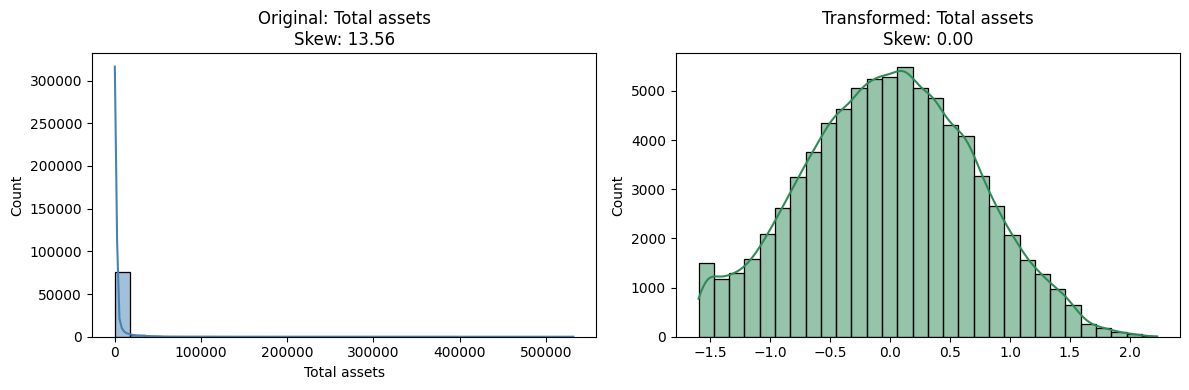

Total Long-term debt - Skewness: 14.85


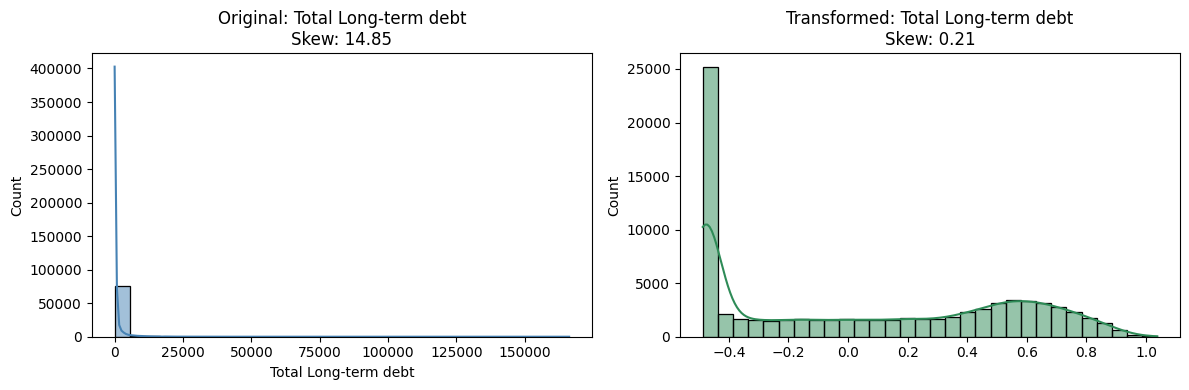

EBIT - Skewness: 17.97


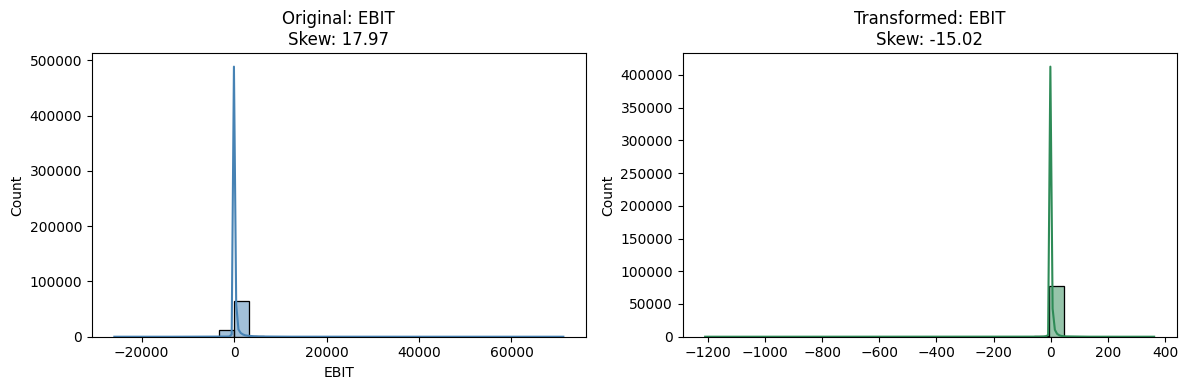

Gross Profit - Skewness: 15.30


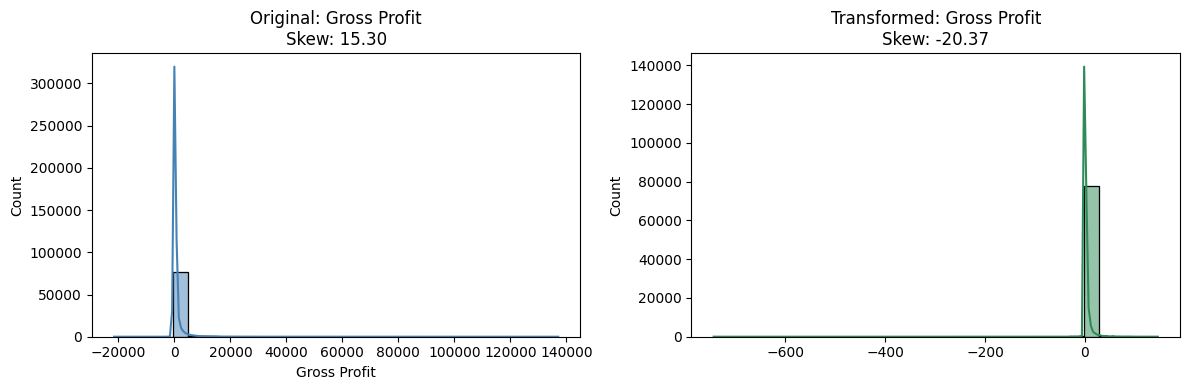

Total Current Liabilities - Skewness: 14.22


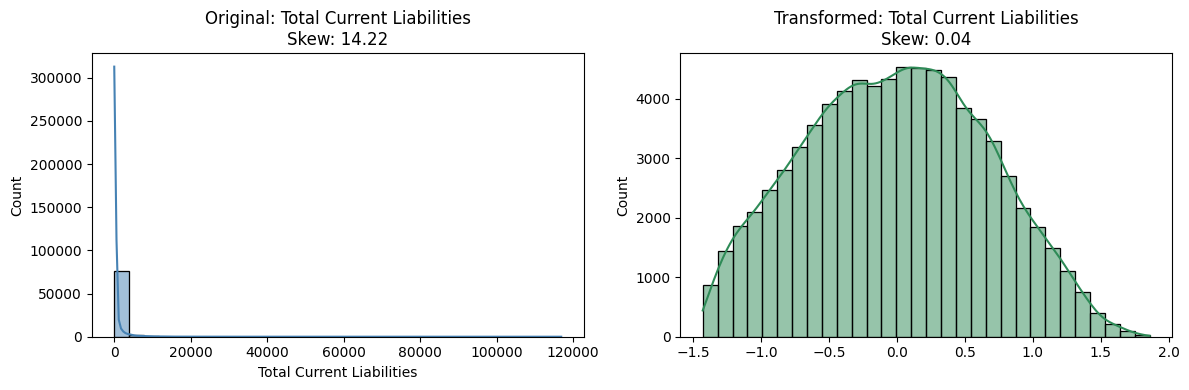

Retained Earnings - Skewness: 29.61


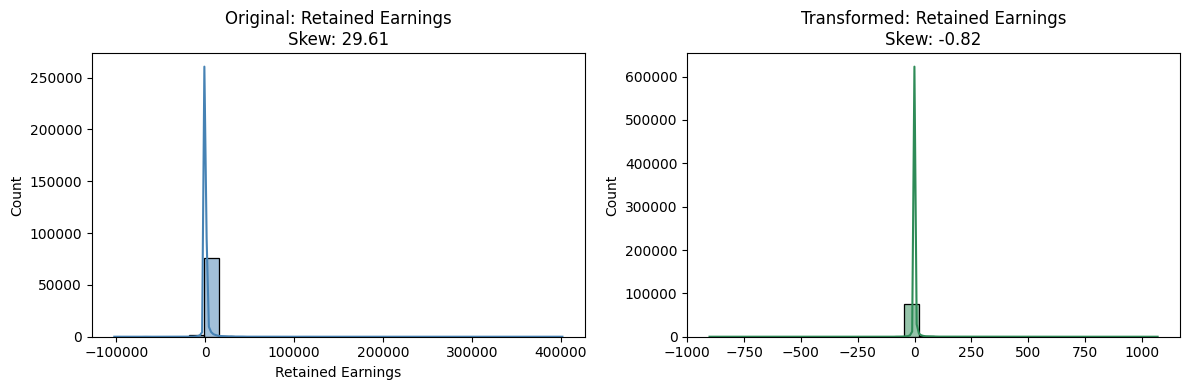

Total Revenue - Skewness: 18.99


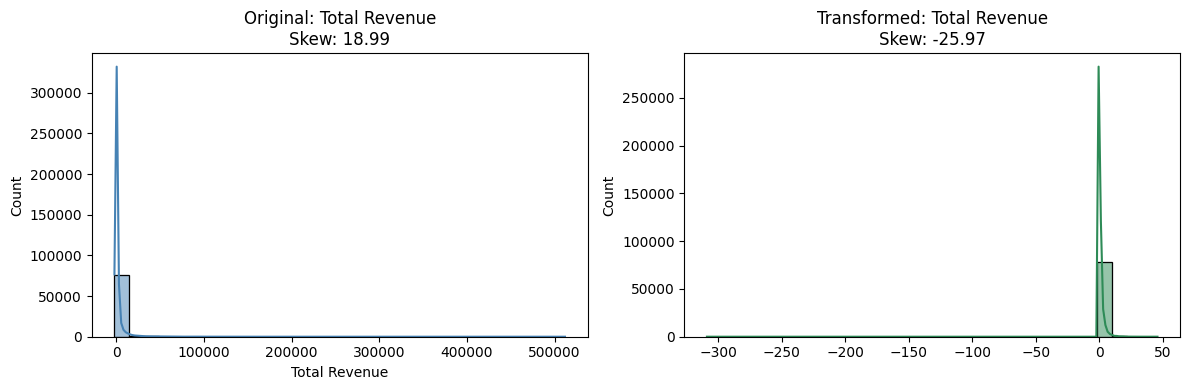

Total Liabilities - Skewness: 13.77


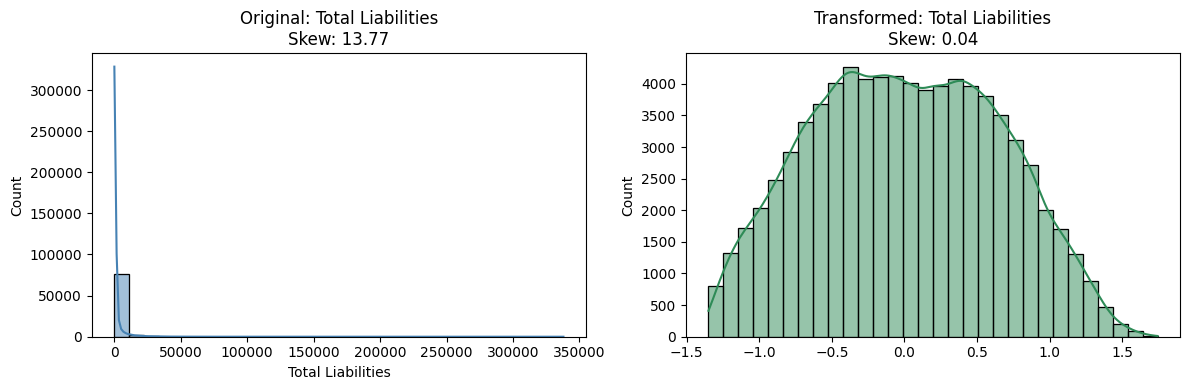

Total Operating Expenses - Skewness: 20.38


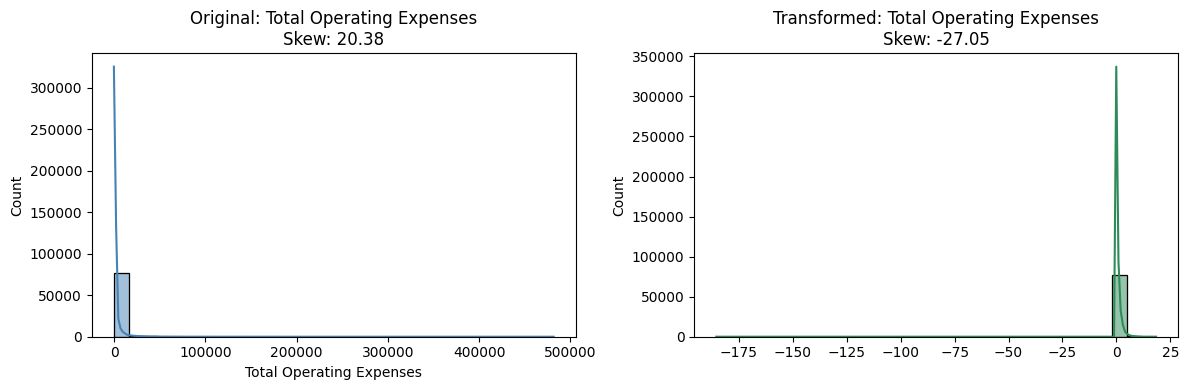

Current assets - Skewness: 14.84


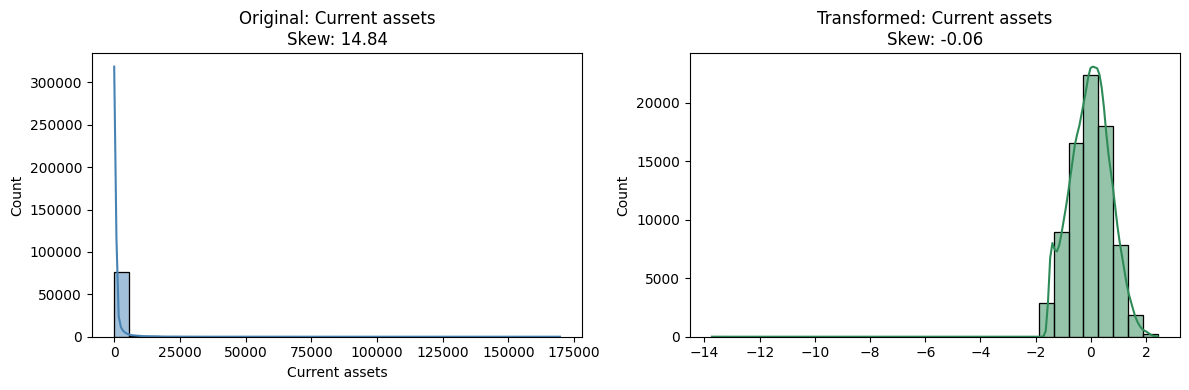

Cost of goods sold - Skewness: 20.05


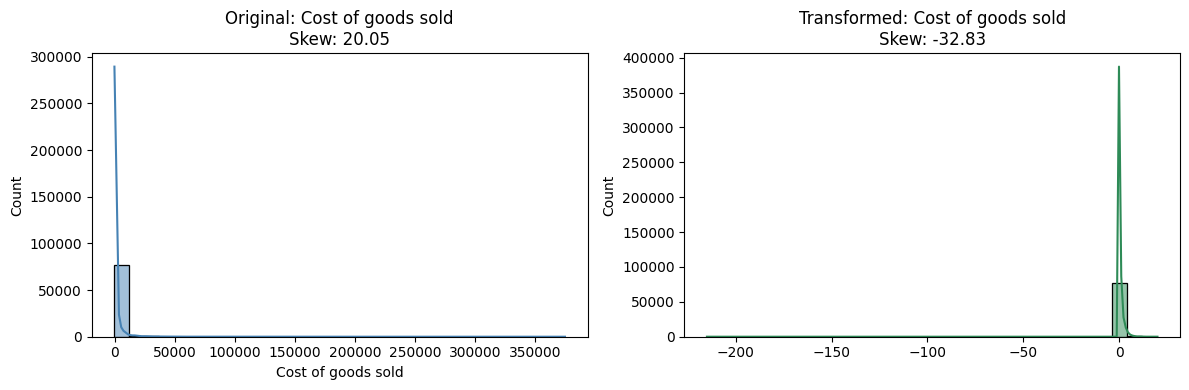

Depreciation and amortization - Skewness: 17.86


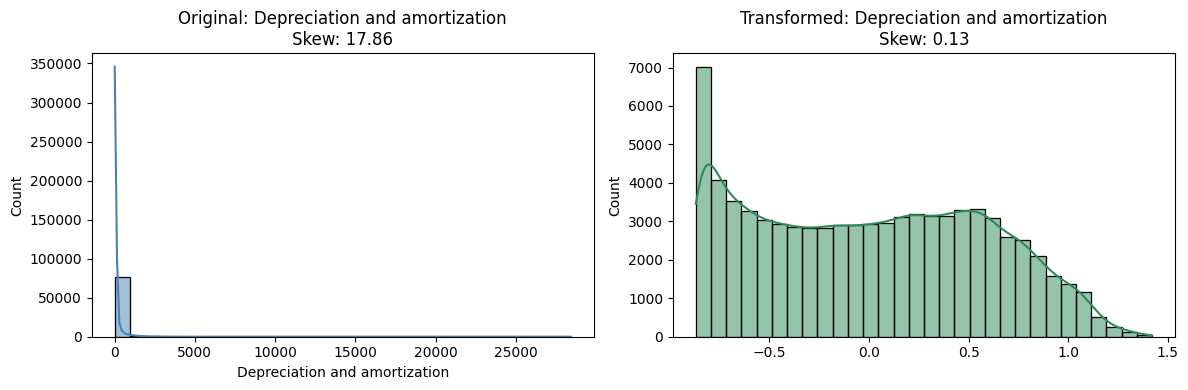

EBITDA - Skewness: 16.40


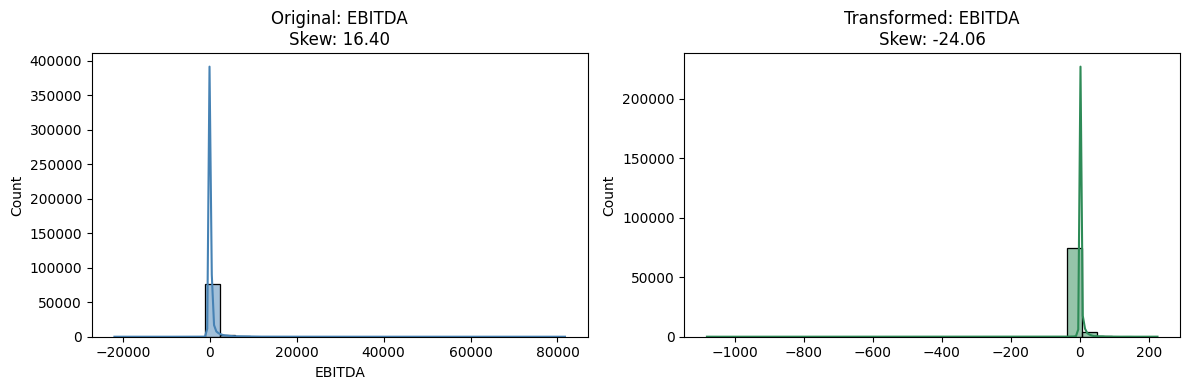

Inventory - Skewness: 22.57


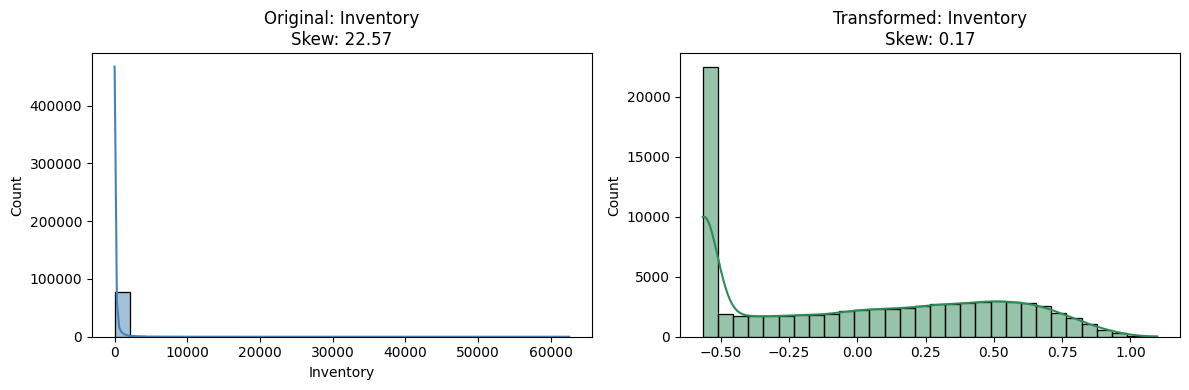

Net Income - Skewness: 11.87


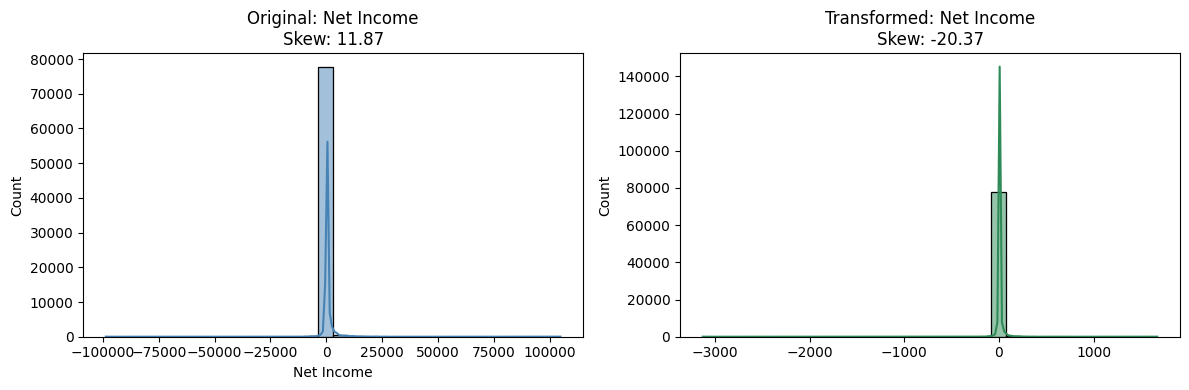

Total Receivables - Skewness: 15.84


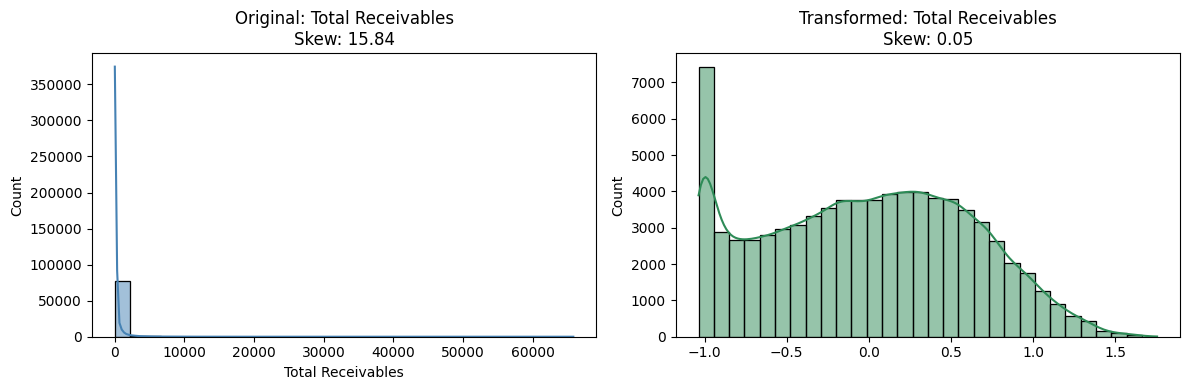

Market Value - Skewness: 18.19


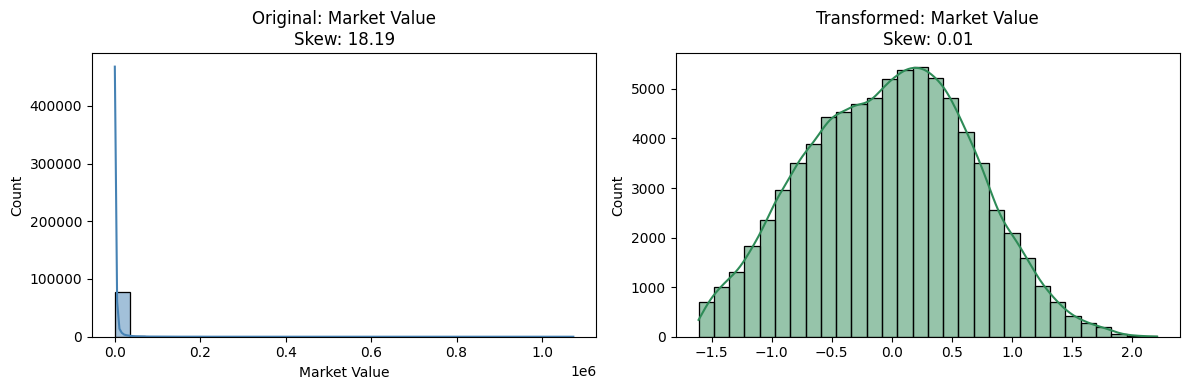

Net sales - Skewness: 18.99


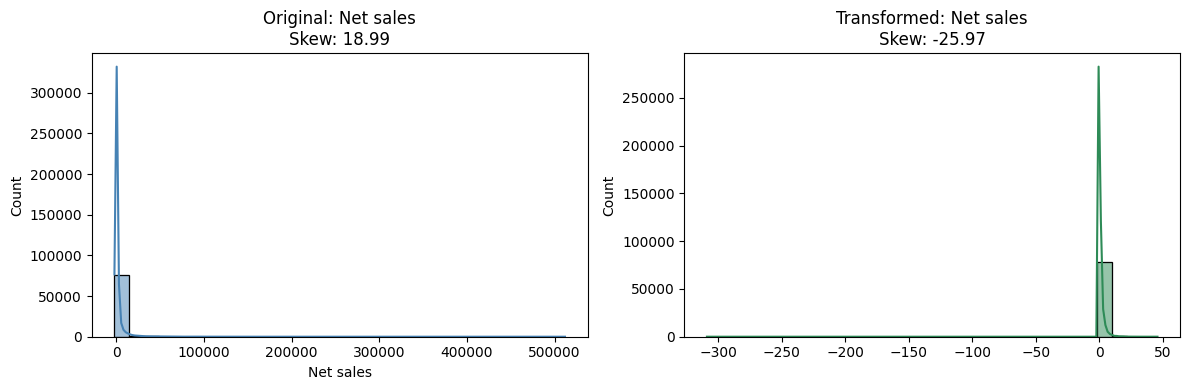

Total assets - Skewness: 13.56


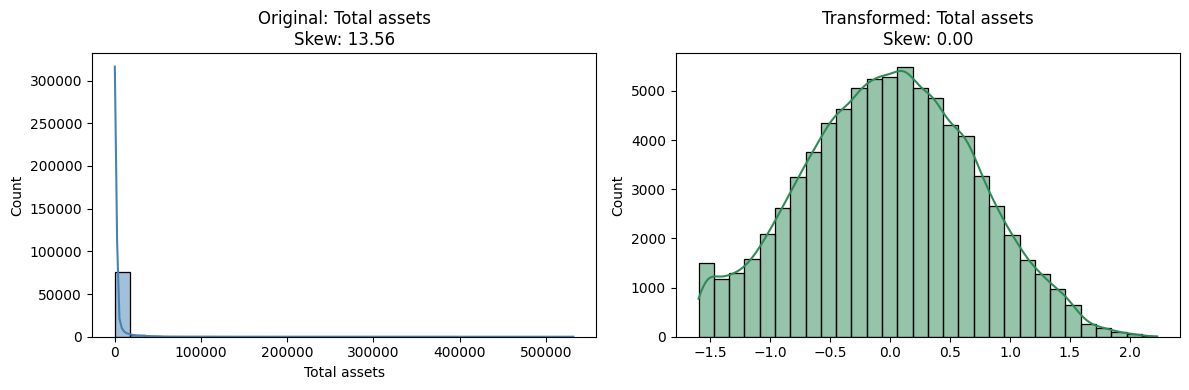

Total Long-term debt - Skewness: 14.85


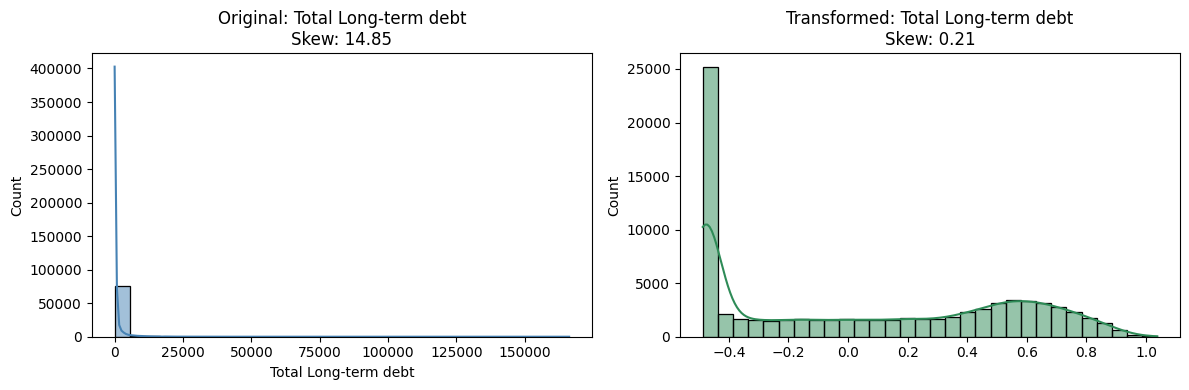

EBIT - Skewness: 17.97


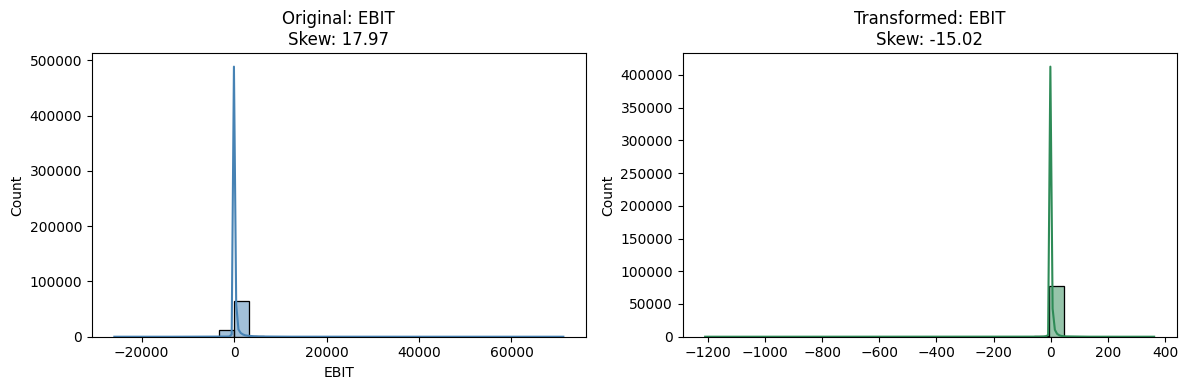

Gross Profit - Skewness: 15.30


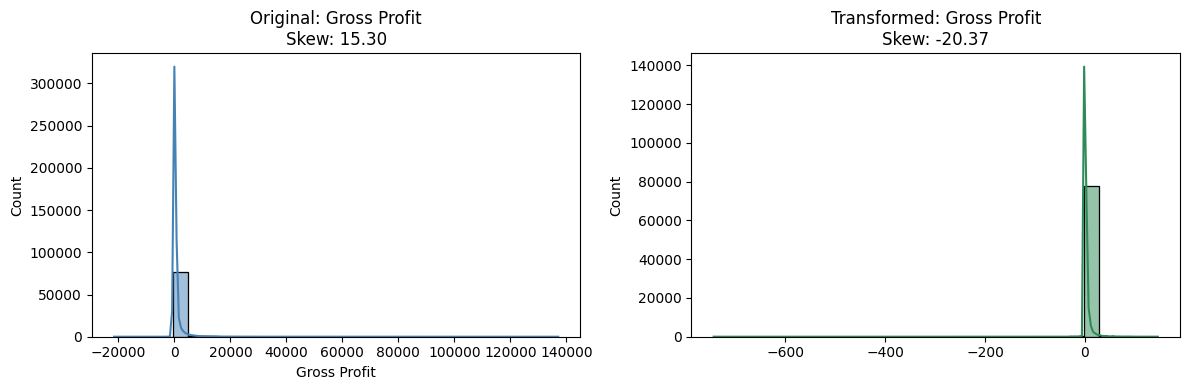

Total Current Liabilities - Skewness: 14.22


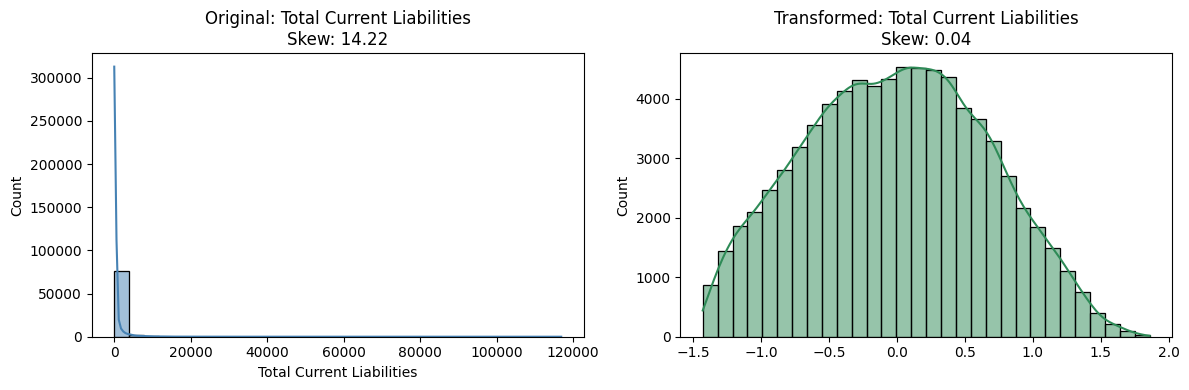

Retained Earnings - Skewness: 29.61


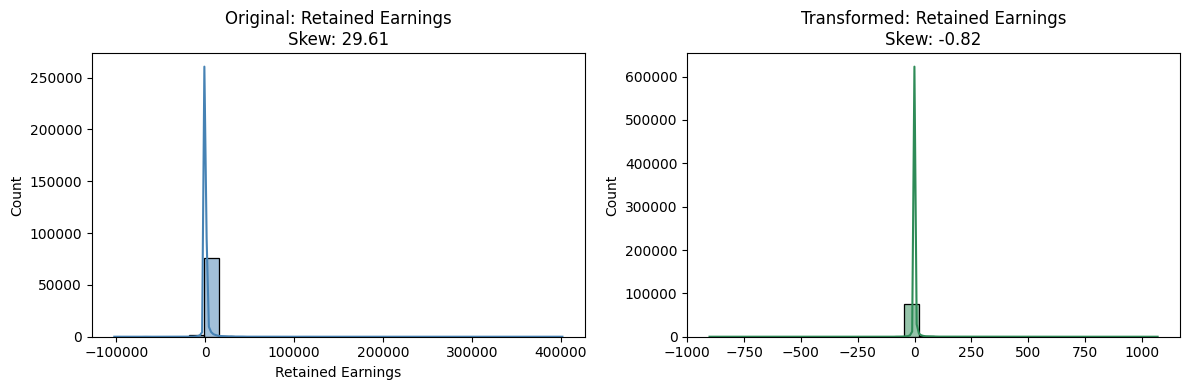

Total Revenue - Skewness: 18.99


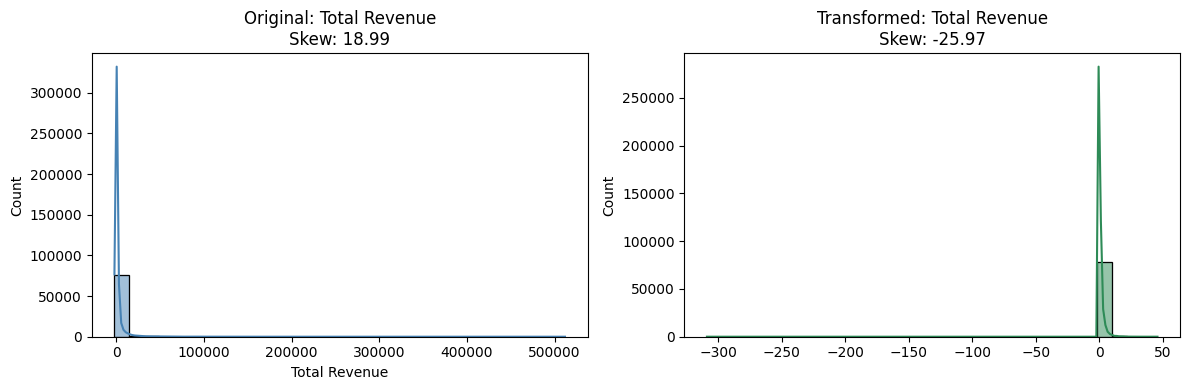

Total Liabilities - Skewness: 13.77


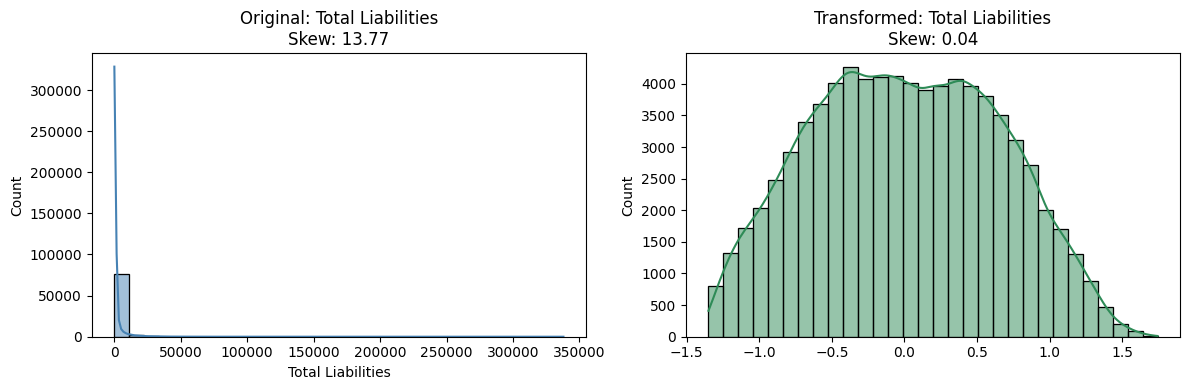

Total Operating Expenses - Skewness: 20.38


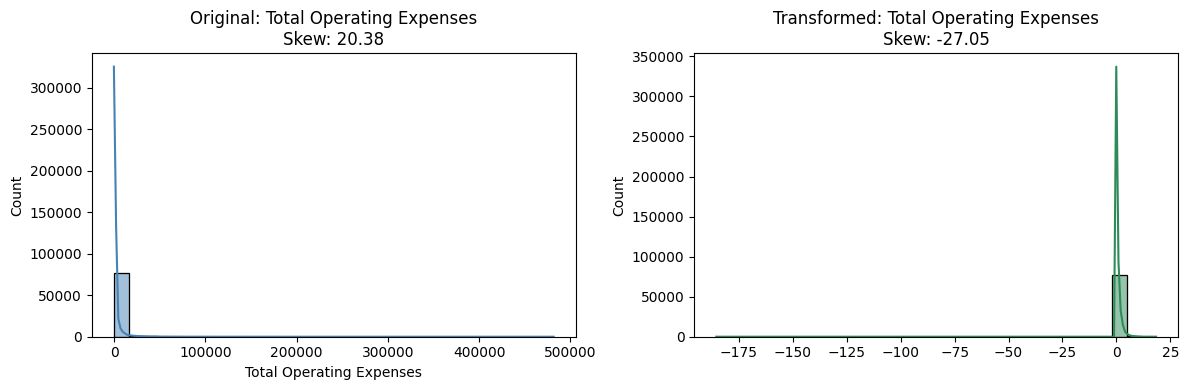

In [18]:
# To just visualize
eda_transform_plot(df, continuous_features)

# To get transformed values
continuous_features = eda_transform_plot(df, continuous_features, return_transformed=True)


In [19]:
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df[continuous_features]

year  Current assets  Cost of goods sold  \
0      1999         511.267             833.107   
1      2000         485.856             713.811   
2      2001         436.656             526.477   
3      2002         396.412             496.747   
4      2003         432.204             523.302   
...     ...             ...                 ...   
78677  2014         233.211              43.338   
78678  2015         105.559              59.184   
78679  2016          63.971              69.074   
78680  2017         135.207              66.527   
78681  2018          82.589              68.817   

       Depreciation and amortization   EBITDA  Inventory  Net Income  \
0                             18.373   89.031    336.018      35.163   
1                             18.577   64.367    320.590      18.531   
2                             22.496   27.207    286.588     -58.939   
3                             27.172   30.745    259.954     -12.410   
4                             26.680   47.491    247.245       3.504   
...                              ...      ...        ...         ...   
78677                         14.094   45.615      3.376      25.261   
78678                         42.592  202.133      2.288     129.688   
78679                         65.057   79.051      2.581      -1.442   
78680                         65.330   69.171      2.013     -20.401   
78681                         65.201   67.262      2.112     -50.946   

       Total Receivables  Market Value  Net sales  Total assets  \
0                128.348      372.7519   1024.333       740.998   
1                115.187      377.1180    874.255       701.854   
2                 77.528      364.5928    638.721       710.199   
3                 66.322      143.3295    606.337       686.621   
4                104.661      308.9071    651.958       709.292   
...                  ...           ...        ...           ...   
78677             22.846      756.4827    104.223      1099.101   
78678             54.611      527.5750    291.153      1865.926   
78679             42.467      578.8868    169.858      1746.235   
78680             27.217      412.6241    161.884      1736.110   
78681             45.839      354.1786    160.513      1625.370   

       Total Long-term debt     EBIT  Gross Profit  Total Current Liabilities  \
0                   180.447   70.658       191.226                    163.816   
1                   179.987   45.790       160.444                    125.392   
2                   217.699    4.711       112.244                    150.464   
3                   164.658    3.573       109.590                    203.575   
4                   248.666   20.811       128.656                    131.261   
...                     ...      ...           ...                        ...   
78677               184.666   31.521        60.885                     28.197   
78678               770.103  159.541       231.969                     88.128   
78679               683.985   13.994       100.784                     85.765   
78680               694.035    3.841        95.357                     82.010   
78681               632.122    2.061        91.696                     79.365   

       Retained Earnings  Total Revenue  Total Liabilities  \
0                201.026       1024.333            401.483   
1                204.065        874.255            361.642   
2                139.603        638.721            399.964   
3                124.106        606.337            391.633   
4                131.884        651.958            407.608   
...                  ...            ...                ...   
78677             28.095        104.223            225.887   
78678            157.783        291.153            880.327   
78679            156.341        169.858            770.233   
78680            135.941        161.884            776.697   
78681             84.995        160.513            712.687   

      

BI-VARIATE ANALYSIS OF CONTINUOUS FEATURES vs CONTINUOUS FEATURES.

In [20]:
print("Continious Features : ",continuous_features
      ,'\nDiscrete Feature: ',discrete_features.columns,'\nCategorical Features: ',categorical_features)

Continious Features :  ['year', 'Current assets', 'Cost of goods sold', 'Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income', 'Total Receivables', 'Market Value', 'Net sales', 'Total assets', 'Total Long-term debt', 'EBIT', 'Gross Profit', 'Total Current Liabilities', 'Retained Earnings', 'Total Revenue', 'Total Liabilities', 'Total Operating Expenses'] 
Discrete Feature:  Index(['year'], dtype='object') 
Categorical Features:  ['status_label']


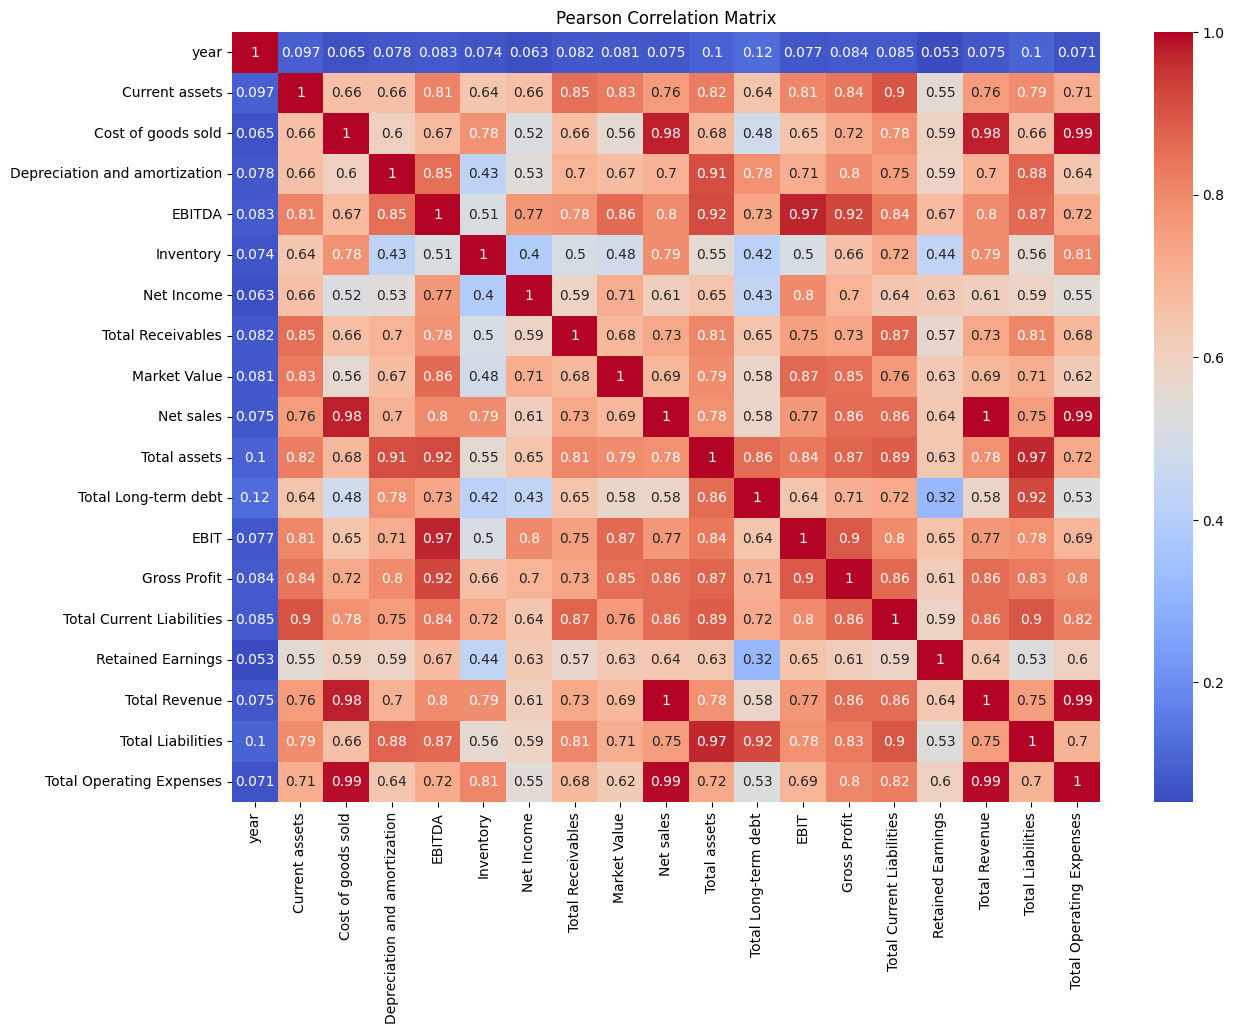

In [21]:
corr_matrix = df[continuous_features].corr(method='pearson')
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')
plt.title("Pearson Correlation Matrix")
plt.show()


In [22]:

# Set your correlation threshold
correlation_threshold = 0.85

# Step 1: Compute Pearson correlation matrix
corr_matrix = df[continuous_features].corr().abs()

# Step 2: Select upper triangle of correlation matrix (to avoid duplicates)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 3: Find highly correlated feature pairs
to_drop = []
suggestions = []

for col in upper_tri.columns:
    high_corr_features = upper_tri.index[upper_tri[col] > correlation_threshold].tolist()
    
    for correlated_col in high_corr_features:
        # Step 4: Compare average correlations of both features
        avg_corr_col = corr_matrix[col].mean()
        avg_corr_correlated = corr_matrix[correlated_col].mean()

        # Drop the one with higher average correlation (more redundant)
        if avg_corr_col > avg_corr_correlated:
            drop_feature = col
            keep_feature = correlated_col
        else:
            drop_feature = correlated_col
            keep_feature = col

        if drop_feature not in to_drop:
            to_drop.append(drop_feature)
            suggestions.append({
                "Drop": drop_feature,
                "Keep": keep_feature,
                "Reason": f"{drop_feature} is more correlated with other features (avg corr: {avg_corr_col:.2f} vs {avg_corr_correlated:.2f})"
            })

# Step 5: Output recommendations
suggestions_df = pd.DataFrame(suggestions)
print("🔍 Suggested Features to Remove Based on Correlation:\n")
print(suggestions_df)
print(to_drop)

🔍 Suggested Features to Remove Based on Correlation:

                        Drop                           Keep  \
0                     EBITDA  Depreciation and amortization   
1             Current assets              Total Receivables   
2                  Net sales             Cost of goods sold   
3               Total assets  Depreciation and amortization   
4                       EBIT                   Market Value   
5               Gross Profit                         EBITDA   
6  Total Current Liabilities                 Current assets   
7              Total Revenue             Cost of goods sold   
8          Total Liabilities  Depreciation and amortization   
9   Total Operating Expenses             Cost of goods sold   

                                              Reason  
0  EBITDA is more correlated with other features ...  
1  Current assets is more correlated with other f...  
2  Net sales is more correlated with other featur...  
3  Total assets is more correlat

BI-VARIATE ANALYSIS

In [23]:

# Step 4: Drop the columns from the DataFrame
reduced_continuous_features = df[continuous_features].drop(columns=to_drop)
reduced_continuous_features.columns.to_list()

['year',
 'Cost of goods sold',
 'Depreciation and amortization',
 'Inventory',
 'Net Income',
 'Total Receivables',
 'Market Value',
 'Total Long-term debt',
 'Retained Earnings']

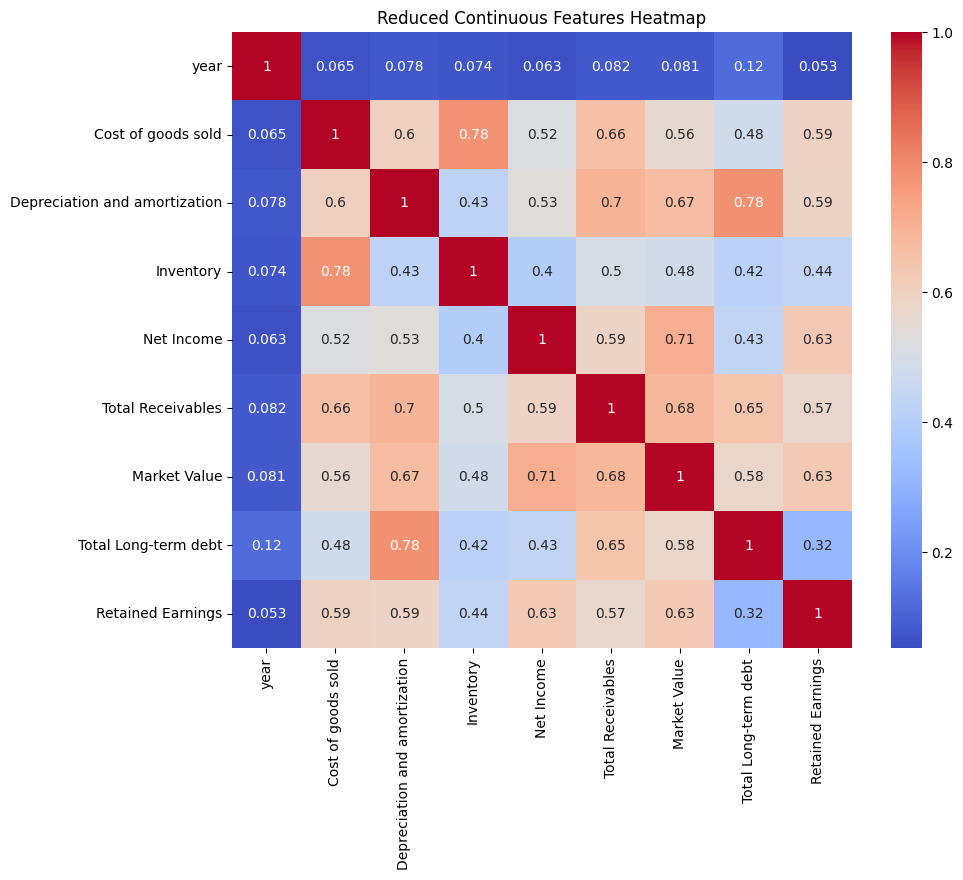

In [24]:
plt.figure(figsize = (10,8))
sns.heatmap(reduced_continuous_features.corr(method = 'pearson'), annot = True, cmap='coolwarm')
plt.title('Reduced Continuous Features Heatmap')
plt.show()

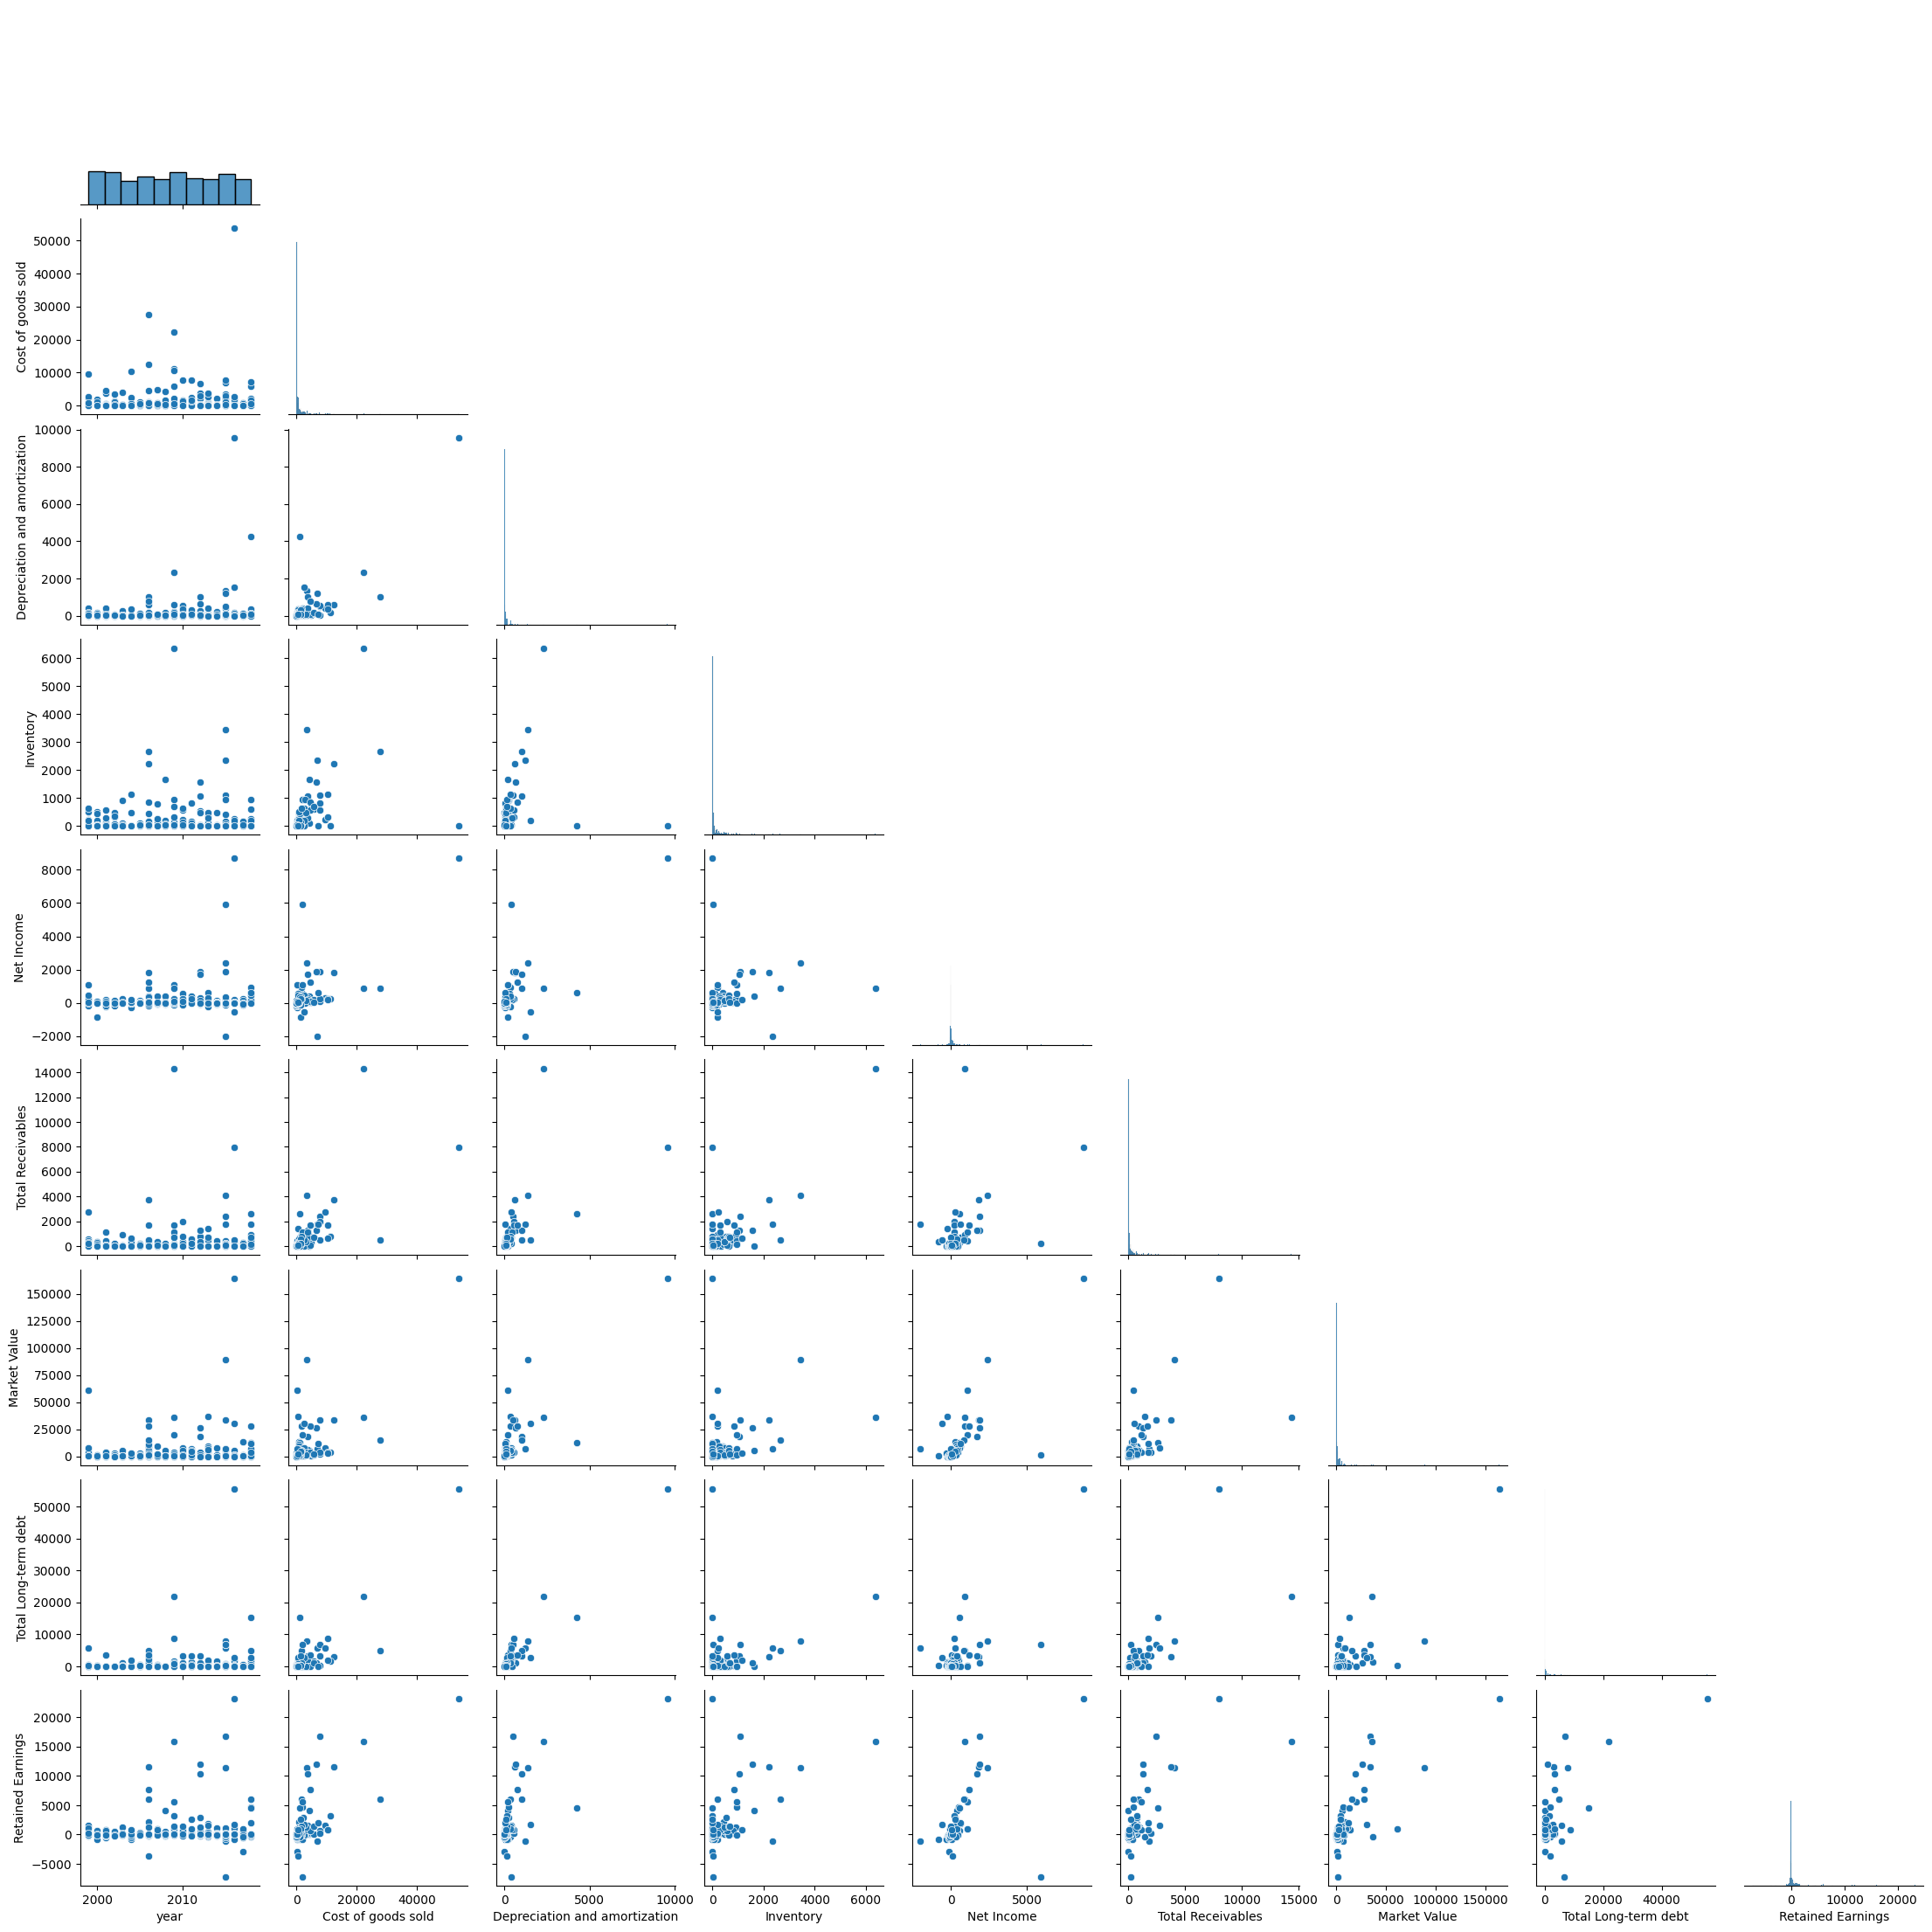

In [25]:
sns.pairplot(reduced_continuous_features.sample(300), corner=True)
plt.show()


In [26]:
from scipy.stats import ttest_ind

for col in reduced_continuous_features:
    # Drop NA values
    temp = df[[col, 'status_label']].dropna()
    group1 = temp[temp['status_label'] == 0][col]
    group2 = temp[temp['status_label'] == 1][col]

    # Perform t-test
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    print(f"{col} → t-stat: {t_stat:.2f}, p-value: {p_val:.4f}")


year → t-stat: -27.53, p-value: 0.0000
Cost of goods sold → t-stat: -15.44, p-value: 0.0000
Depreciation and amortization → t-stat: -8.48, p-value: 0.0000
Inventory → t-stat: -13.45, p-value: 0.0000
Net Income → t-stat: -20.02, p-value: 0.0000
Total Receivables → t-stat: -21.35, p-value: 0.0000
Market Value → t-stat: -32.42, p-value: 0.0000
Total Long-term debt → t-stat: -3.88, p-value: 0.0001
Retained Earnings → t-stat: -21.19, p-value: 0.0000


📌 Conclusion:
All continuous variables show statistically significant differences (p < 0.05) between bankrupt and non-bankrupt groups.

This suggests these financial indicators are informative features for predicting or explaining bankruptcy.

No need to drop any of these — they carry meaningful signal and can be used in modeling or deeper financial analysis.

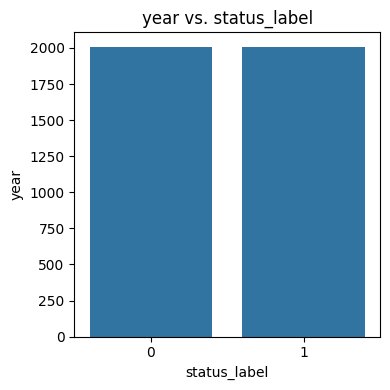

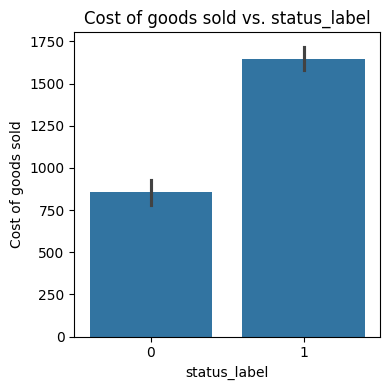

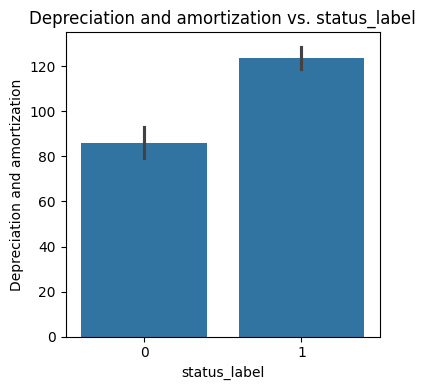

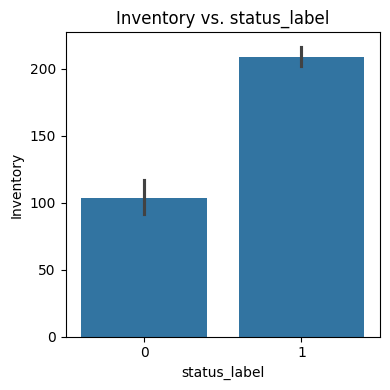

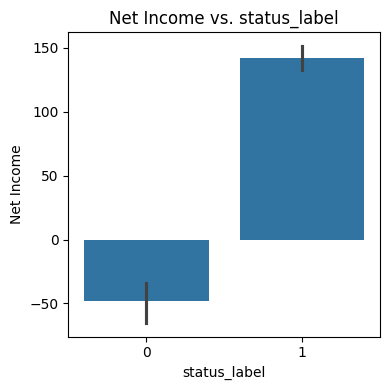

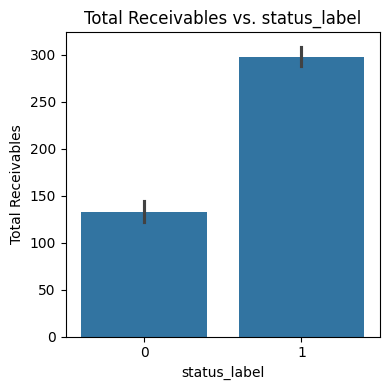

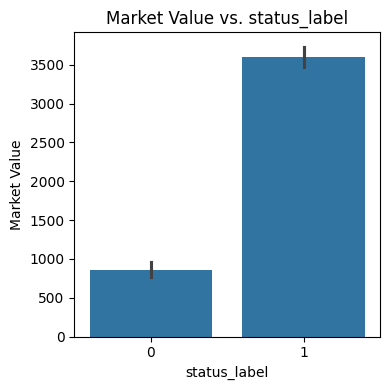

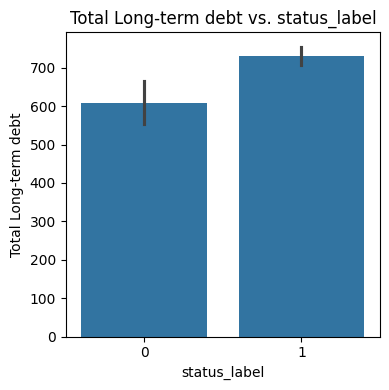

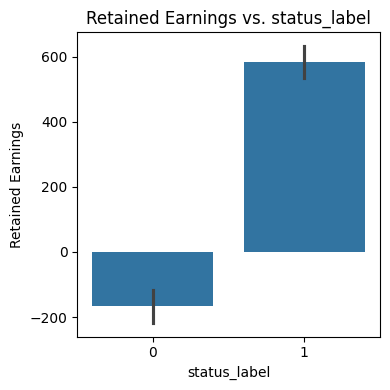

In [27]:
for col in reduced_continuous_features.columns:
    plt.figure(figsize=(4, 4))
    sns.barplot(x='status_label', y=col, data=df)
    plt.title(f'{col} vs. status_label')
    plt.tight_layout()
    plt.show()

BI-VARIATE ANALYSIS OF CATEGORICAL FEATURES vs DISCRETE FEATURES.

In [28]:
from scipy.stats import chi2_contingency  # Required import

pd_crosstab = pd.crosstab(df['year'], df['status_label'])
chi2, p, dof, expected = chi2_contingency(pd_crosstab)
print("Chi-Square Test Results")
print("------------------------")
print("Chi2 Statistic :", round(chi2, 4))
print("p-value        :", round(p, 4))
print("Degrees of Freedom :", dof)
print("\nExpected Frequencies:")
expected_df = pd.DataFrame(expected, index=pd_crosstab.index, columns=pd_crosstab.columns)
print(expected_df)

Chi-Square Test Results
------------------------
Chi2 Statistic : 731.2001
p-value        : 0.0
Degrees of Freedom : 19

Expected Frequencies:
status_label           0            1
year                                 
1999          352.148649  4955.851351
2000          346.708523  4879.291477
2001          324.881676  4572.118324
2002          308.561297  4342.438703
2003          293.037035  4123.962965
2004          288.459368  4059.540632
2005          278.972319  3926.027681
2006          273.863908  3854.136092
2007          265.969091  3743.030909
2008          255.884955  3601.115045
2009          248.321853  3494.678147
2010          240.493378  3384.506622
2011          233.062962  3279.937038
2012          231.205358  3253.794642
2013          231.139015  3252.860985
2014          232.465875  3271.534125
2015          222.514425  3131.485575
2016          211.700516  2979.299484
2017          199.957805  2814.042195
2018          180.651992  2542.348008


🧠 Interpretation:
There is a statistically significant relationship between the year and the bankruptcy status of companies. 
This implies that the likelihood of bankruptcy is not uniformly distributed across years. Certain years likely
had higher or lower bankruptcy rates — possibly due to economic cycles, policy changes, or industry shifts.

<Figure size 1200x600 with 0 Axes>

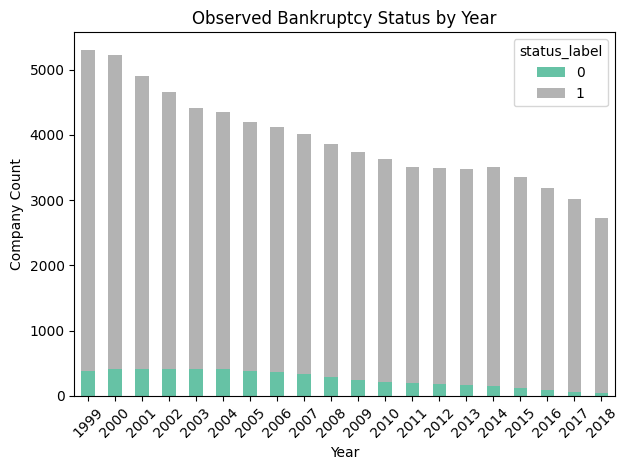

In [29]:
plt.figure(figsize=(12,6))
pd_crosstab.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Observed Bankruptcy Status by Year")
plt.ylabel("Company Count")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

MULTI-VARIATE ANALYSIS CONTINUOUS FEATURES VS CONTINUOUS FEATURES

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [31]:
vif_data = pd.DataFrame()
vif_data["Feature"] = reduced_continuous_features.columns
vif_data["VIF"] = [variance_inflation_factor(reduced_continuous_features.values, i) for i in range(reduced_continuous_features.shape[1])]

# Display VIF sorted by highest first
print(vif_data.sort_values(by="VIF", ascending=False))

                         Feature       VIF
2  Depreciation and amortization  4.376951
1             Cost of goods sold  4.090087
7           Total Long-term debt  3.502274
6                   Market Value  3.191790
5              Total Receivables  3.038389
3                      Inventory  2.869585
8              Retained Earnings  2.551365
4                     Net Income  2.379139
0                           year  1.072124


🎯 Final Conclusion
All VIF values are below 5, indicating:

No severe multicollinearity issues

Features are suitable for reliable interpretation and modeling

We can confidently proceed with further multivariate analysis (Logistic Regression, MANOVA, etc.) without risk of inflated variance due to multicollinearity.

C:\Users\AFC\AppData\Local\Temp\ipykernel_2788\1967184281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VIF", y="Feature", data=vif_data_sorted, palette="Blues_r")


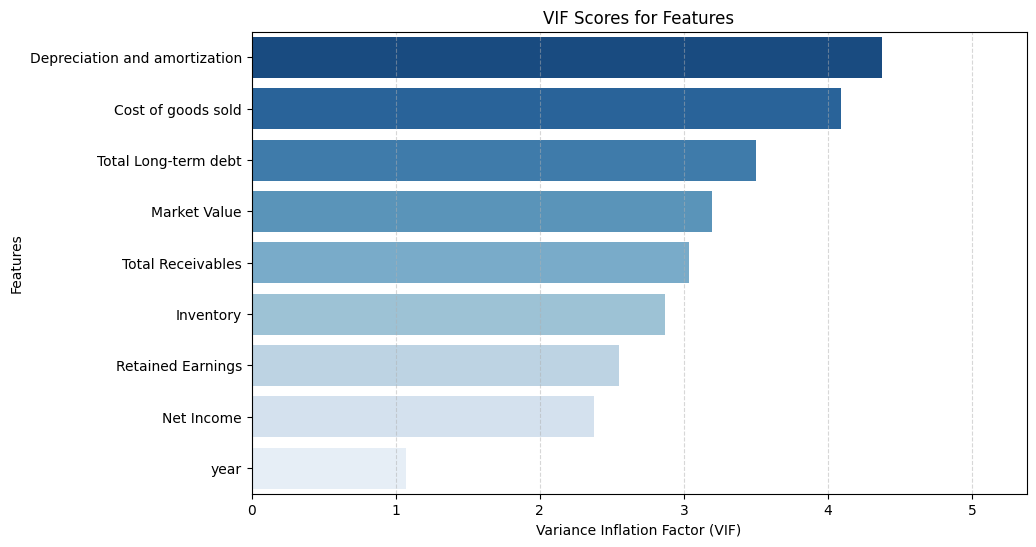

In [32]:
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

# Horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="Feature", data=vif_data_sorted, palette="Blues_r")

plt.title("VIF Scores for Features")
plt.xlabel("Variance Inflation Factor (VIF)")
plt.ylabel("Features")
plt.xlim(0, max(vif_data_sorted["VIF"]) + 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

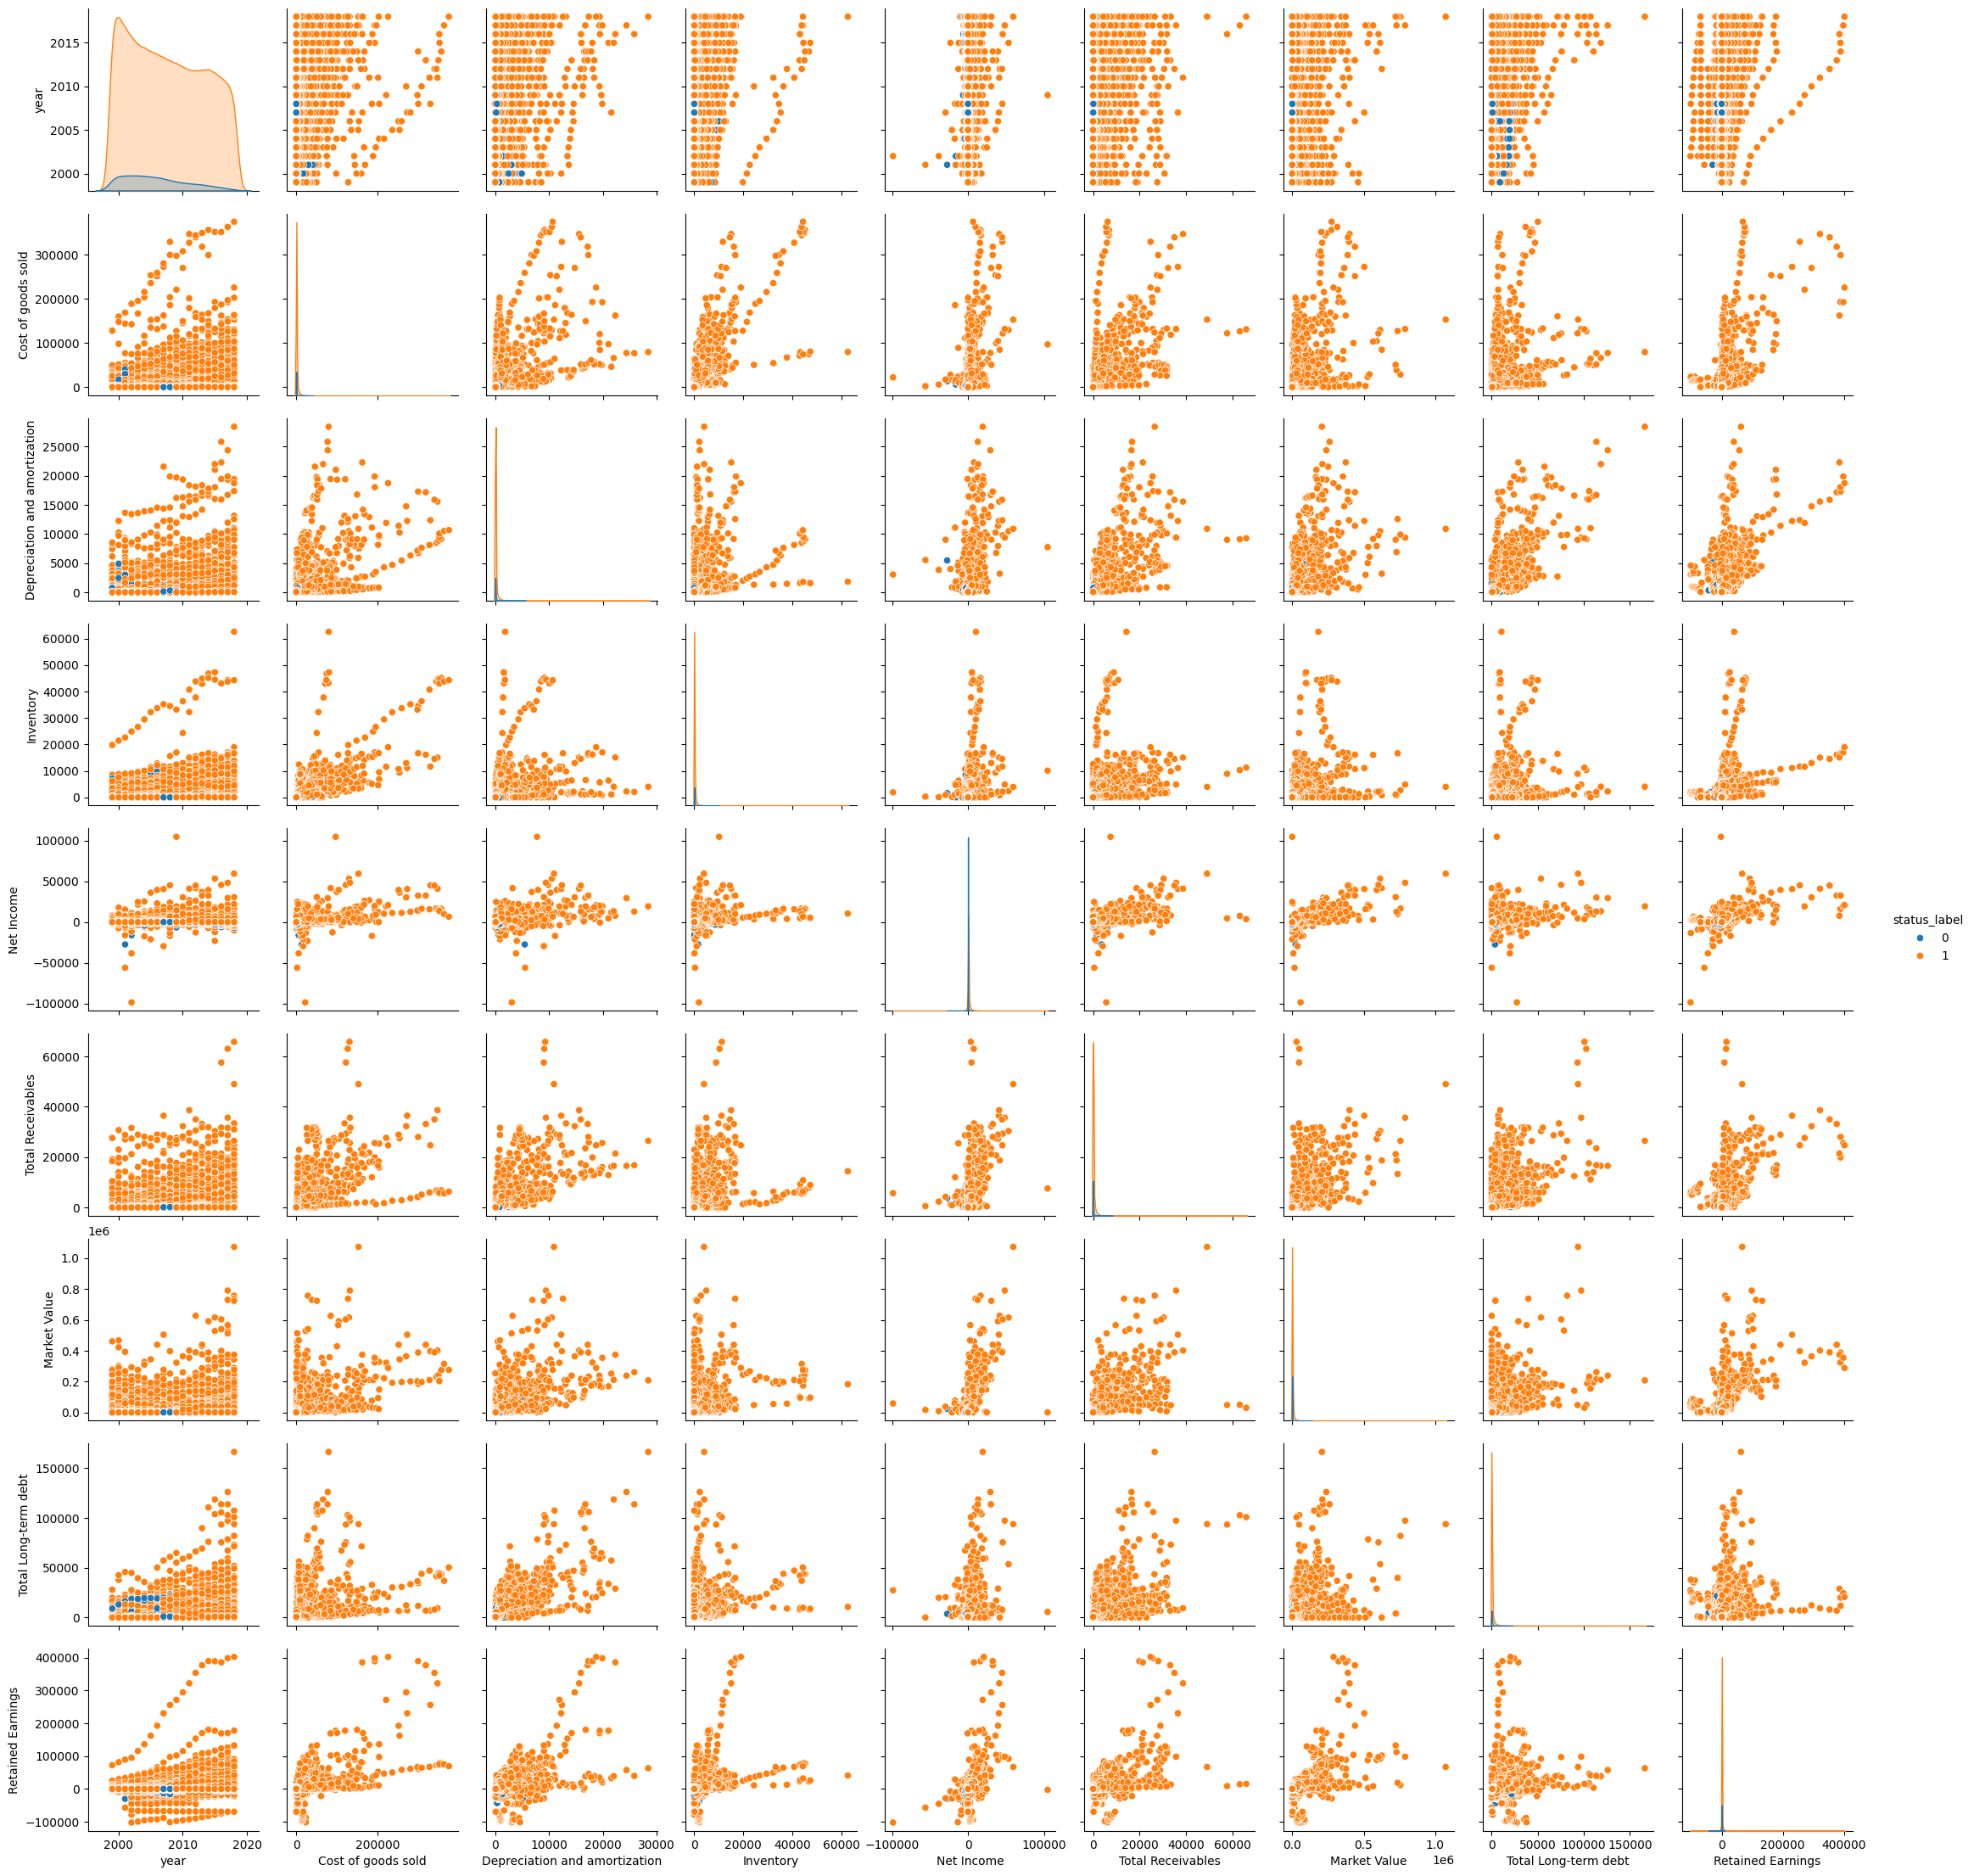

In [33]:
reduced_feature_list = df[['year',
 'Cost of goods sold',
 'Depreciation and amortization',
 'Inventory',
 'Net Income',
 'Total Receivables',
 'Market Value',
 'Total Long-term debt',
 'Retained Earnings']
].columns.tolist()

reduced_df = df[reduced_feature_list + ['status_label']].copy()

# Convert to int if needed
reduced_df['status_label'] = reduced_df['status_label'].astype(int)

# Pairplot
sns.pairplot(reduced_df, hue='status_label', diag_kind='kde')
plt.show()


In [34]:
from scipy.stats import kruskal
df_clean = df.dropna(subset=['status_label'])
df_clean['status_label'] = df_clean['status_label'].astype(int)

for feature in reduced_continuous_features:
    group0 = df_clean[df_clean['status_label'] == 0][feature]
    group1 = df_clean[df_clean['status_label'] == 1][feature]
    
    if len(group0) > 0 and len(group1) > 0:
        stat, p = kruskal(group0, group1)
        print(f"Kruskal-Wallis test for {feature}: H-statistic = {stat:.4f}, p-value = {p:.4e}")
    else:
        print(f"Not enough data in one of the groups for feature: {feature}")


Kruskal-Wallis test for year: H-statistic = 502.3647, p-value = 2.9071e-111
Kruskal-Wallis test for Cost of goods sold: H-statistic = 8.0662, p-value = 4.5099e-03
Kruskal-Wallis test for Depreciation and amortization: H-statistic = 0.3790, p-value = 5.3812e-01
Kruskal-Wallis test for Inventory: H-statistic = 13.0289, p-value = 3.0672e-04
Kruskal-Wallis test for Net Income: H-statistic = 980.3695, p-value = 3.3211e-215
Kruskal-Wallis test for Total Receivables: H-statistic = 133.0323, p-value = 8.8953e-31
Kruskal-Wallis test for Market Value: H-statistic = 384.3159, p-value = 1.4300e-85
Kruskal-Wallis test for Total Long-term debt: H-statistic = 89.8555, p-value = 2.5620e-21
Kruskal-Wallis test for Retained Earnings: H-statistic = 618.1158, p-value = 1.9211e-136


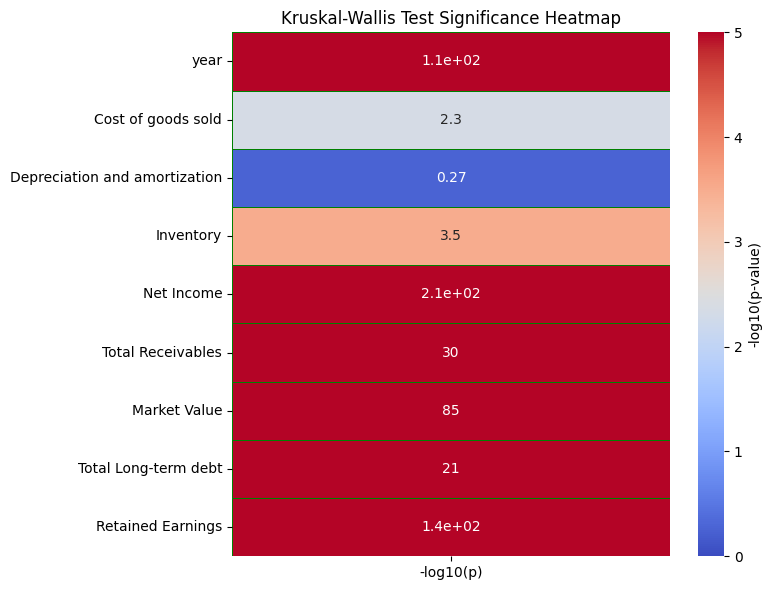

In [35]:
p_values = {}

for feature in reduced_continuous_features:
    group_0 = df_clean[df_clean['status_label'] == 0][feature]
    group_1 = df_clean[df_clean['status_label'] == 1][feature]
    
    # Ensure we have data in both groups
    if len(group_0) > 0 and len(group_1) > 0:
        stat, p = kruskal(group_0, group_1)
        p_values[feature] = p
    else:
        p_values[feature] = None
pval_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p_value'])

# Apply -log10 to highlight small p-values in heatmap
pval_df['-log10(p)'] = -np.log10(pval_df['p_value'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    pval_df[['-log10(p)']],
    annot=True,
    cmap='coolwarm',
    cbar_kws={'label': '-log10(p-value)'},
    vmin=0, vmax=5,  # sets fixed scale for meaningful comparison
    linewidths=0.5,
    linecolor='green'
)

plt.title('Kruskal-Wallis Test Significance Heatmap')
plt.tight_layout()
plt.show()

How do financially healthy companies (status_label = 1) differ from others in terms of Net Income and Market Value?

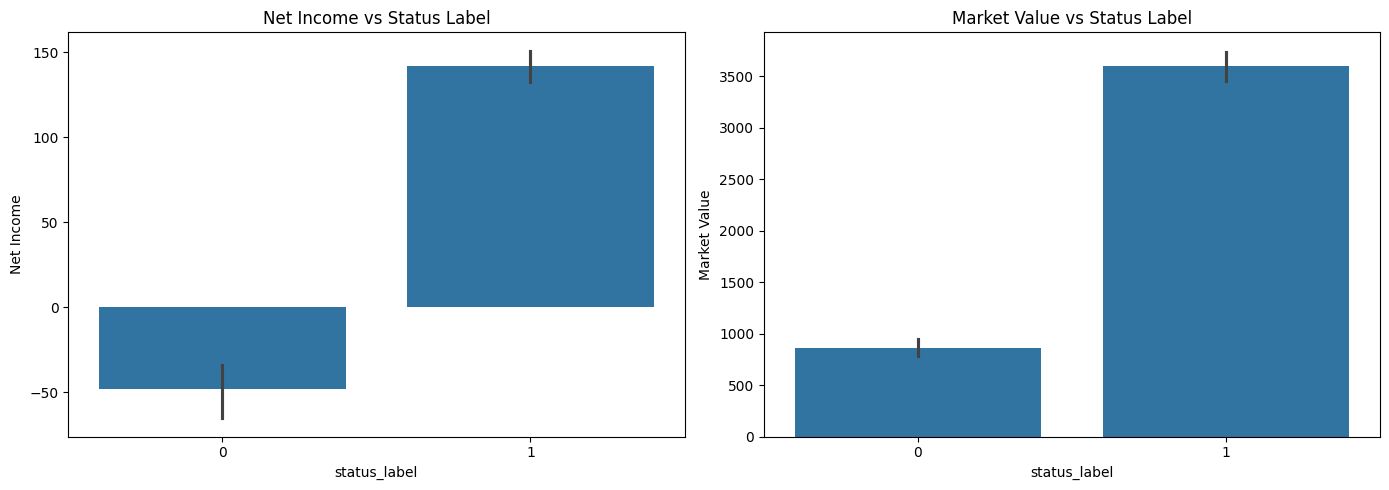

In [36]:
plt.figure(figsize=(14, 5))
for i, col in enumerate(['Net Income', 'Market Value'], start=1):
    plt.subplot(1, 2, i)
    sns.barplot(x='status_label', y=col, data=df_clean)
    plt.title(f'{col} vs Status Label')
plt.tight_layout()
plt.show()


Has the distribution of status_label changed over the years, and what does that say about industry trends or financial stability over time?

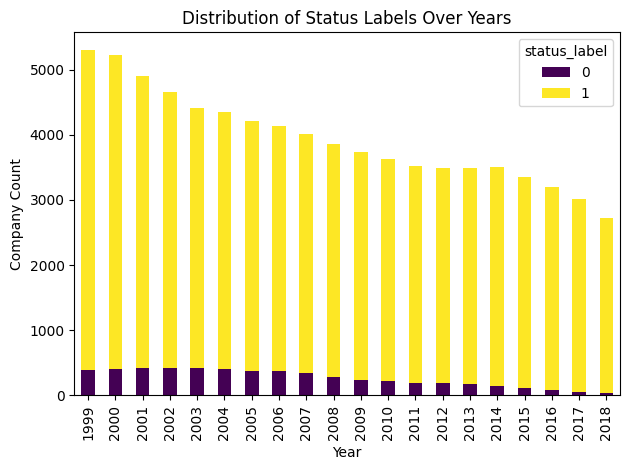

In [37]:
status_year = df_clean.groupby(['year', 'status_label']).size().unstack()
status_year.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Distribution of Status Labels Over Years")
plt.xlabel("Year")
plt.ylabel("Company Count")
plt.tight_layout()
plt.show()

Which financial features contribute most to differentiating companies based on their status label, and how strong are these differences?



C:\Python\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


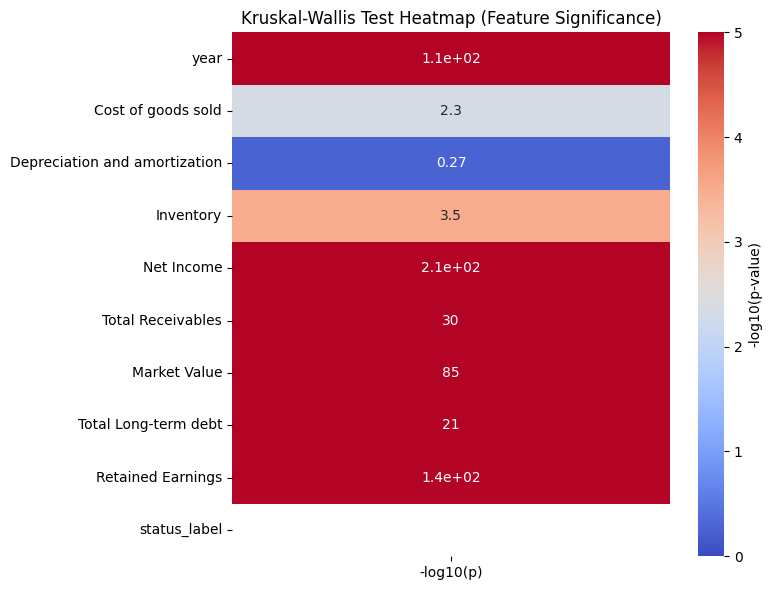

In [38]:
pvals = {}
for feature in reduced_df.columns:
    group0 = df_clean[df_clean['status_label'] == 0][feature]
    group1 = df_clean[df_clean['status_label'] == 1][feature]
    if len(group0) > 0 and len(group1) > 0:
        stat, p = kruskal(group0, group1)
        pvals[feature] = p
    else:
        pvals[feature] = np.nan

pval_df = pd.DataFrame.from_dict(pvals, orient='index', columns=['p_value'])
pval_df['-log10(p)'] = -np.log10(pval_df['p_value'])

# Heatmap of Kruskal significance
plt.figure(figsize=(8, 6))
sns.heatmap(pval_df[['-log10(p)']], annot=True, cmap='coolwarm', cbar_kws={'label': '-log10(p-value)'}, vmin=0, vmax=5)
plt.title('Kruskal-Wallis Test Heatmap (Feature Significance)')
plt.tight_layout()
plt.show()

Is there redundancy between financial metrics such as Net Income and Retained Earnings, and can one be used as a proxy for profitability?

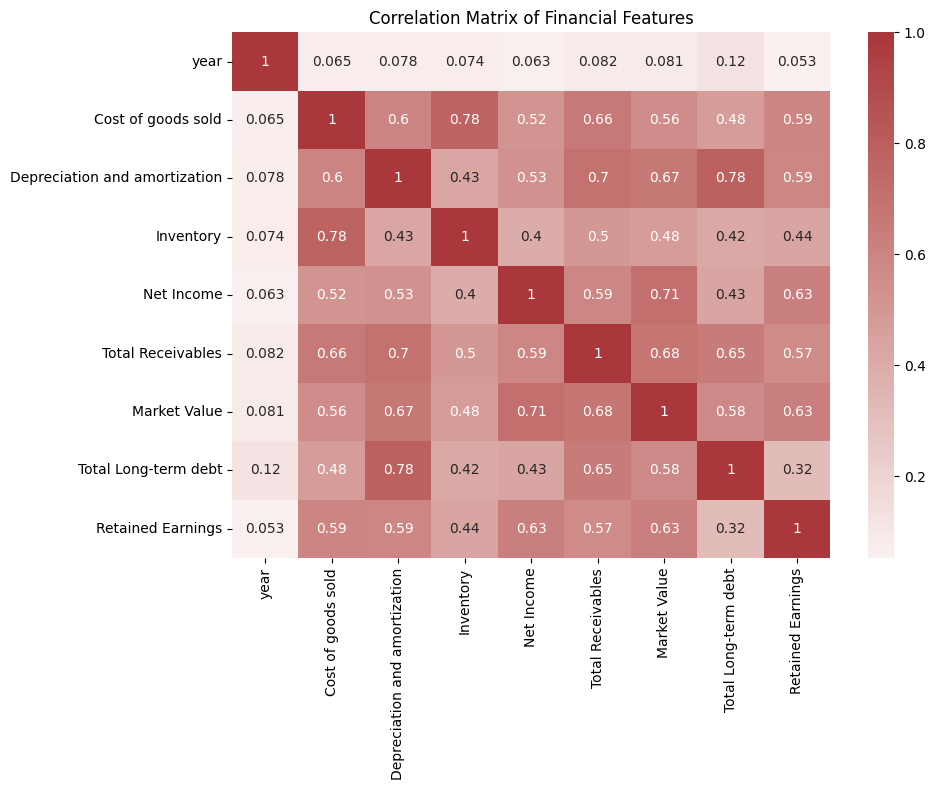

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(reduced_continuous_features.corr(), annot=True, cmap='vlag', center=0)
plt.title("Correlation Matrix of Financial Features")
plt.tight_layout()
plt.show()

Are there any financial risk indicators (e.g., high debt, low inventory) consistently associated with companies labeled as 0?



C:\Users\AFC\AppData\Local\Temp\ipykernel_2788\1258145425.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('status_label')[numeric_cols].mean().T



--- Financial Feature Differences Between Groups ---

                               Status 0 Avg  Status 1 Avg   Difference
Market Value                     857.813011   3596.015157  2738.202146
Total assets                    1664.630981   2952.555391  1287.924410
Net sales                       1183.957172   2447.871581  1263.914409
Total Revenue                   1183.957172   2447.871581  1263.914409
Total Operating Expenses        1045.388596   2054.187022  1008.798426
Cost of goods sold               856.340997   1646.982563   790.641566
Retained Earnings               -165.107267    582.034710   747.141977
Total Liabilities               1266.816748   1809.571974   542.755226
Current assets                   399.339353    914.542615   515.203262
Gross Profit                     327.616175    800.889131   473.272956
Total Current Liabilities        347.233954    628.748794   281.514840
EBITDA                           138.568576    393.684586   255.116009
EBIT                  

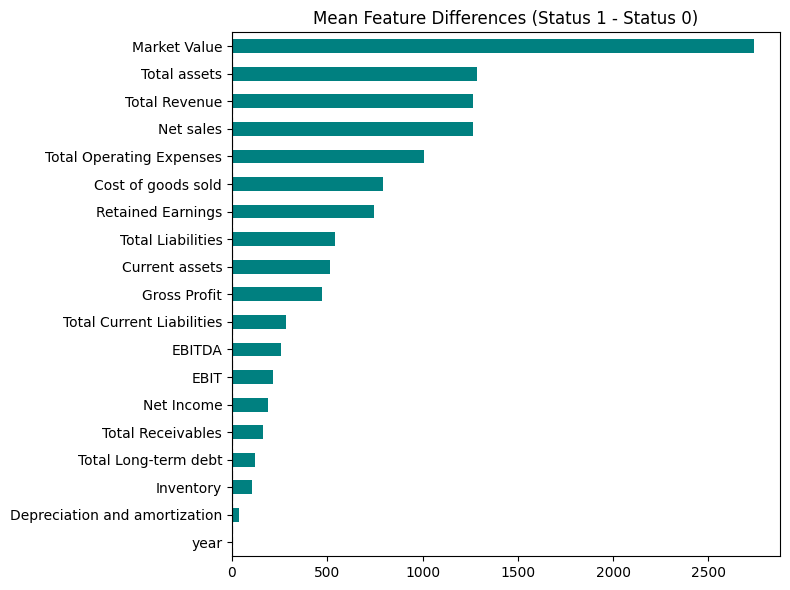

In [40]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

grouped = df.groupby('status_label')[numeric_cols].mean().T


grouped.columns = ['Status 0 Avg', 'Status 1 Avg']

grouped['Difference'] = grouped['Status 1 Avg'] - grouped['Status 0 Avg']

print("\n--- Financial Feature Differences Between Groups ---\n")
print(grouped.sort_values('Difference', ascending=False))

grouped['Difference'].sort_values().plot(kind='barh', figsize=(8, 6), color='teal')
plt.axvline(0, color='black', linestyle='--')
plt.title("Mean Feature Differences (Status 1 - Status 0)")
plt.tight_layout()
plt.show()
